<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [2]:
# import the pacakges
import numpy as np
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

#Feature engine pipeline and methods
import feature_engine.imputation as mdi
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.imputation import RandomSampleImputer
from feature_engine.outliers import ArbitraryOutlierCapper
from feature_engine.imputation import AddMissingIndicator
from feature_engine.discretisation import EqualFrequencyDiscretiser


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Identifying relationships
from scipy.stats import chi2_contingency 
import scipy.stats as stats

#change settings
pd.set_option('display.max_columns', None)

### Step 1: Load Data into Jupyter Notebook

In [2]:
#Read csv and import into a pandas Dataframe
data = pd.read_csv('song_popularity.csv')
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


In [3]:
#Display end of the dataset
data.tail()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
18830,LI20,Let It Breathe,159645,0.87514,0.49500,15.1,0.000065,11,123.4321,1,52.20,113.969,0.300,Lo,-16.107,Chatter,31.80,22.65
18831,LI18,Answers,205666,0.74970,0.49005,16.1,0.000001,11,122.1025,0,45.15,94.286,0.265,Low,-14.078,Babble,32.91,24.15
18832,MI16,Sudden Love (Acoustic),182211,0.83006,0.71181,32.5,0.000000,0,126.5625,1,53.25,130.534,0.286,NaN,-12.222,Babble,15.18,48.75
18833,MI16,Gentle on My Mind,352280,0.92610,0.48312,32.6,0.015700,3,125.2161,1,49.20,106.063,0.323,Medium,-12.020,Babble,33.01,48.90
18834,MI15,Up to Me,193533,0.89278,0.63360,38.1,0.000254,4,121.8816,1,45.30,91.490,0.581,Med,-11.790,Rumble,37.11,57.15


In [4]:
#Displays the data types, entries and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [5]:
#Display statistics for each variable
data.describe()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
count,1.883500e+04,18835.000000,15938.000000,18835.000000,18835.000000,18835.000000,18835.000000,13184.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.253368,0.626669,64.499476,0.078008,5.289196,0.628139,152.173475,121.073154,0.527967,-7.447435,42.357670,96.749215
std,5.988754e+04,0.282945,0.155086,21.410076,0.221591,3.614595,0.483314,155.018531,28.714456,0.244632,3.827831,13.949829,32.115110
min,1.200000e+04,0.000001,0.000000,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.768000,0.000000,0.160000
25%,1.843395e+05,0.023618,0.526680,51.000000,0.000000,2.000000,0.000000,56.700000,98.368000,0.335000,-9.044000,32.790000,76.500000
50%,2.113060e+05,0.129360,0.636570,67.400000,0.000011,5.000000,1.000000,83.250000,120.013000,0.527000,-6.555000,42.730000,101.100000
75%,2.428440e+05,0.415520,0.740520,81.500000,0.002570,8.000000,1.000000,177.000000,139.931000,0.725000,-4.908000,52.290000,122.250000
max,1.799346e+06,0.976080,0.977130,99.900000,0.997000,11.000000,1.000000,1410.000000,242.318000,0.984000,1.585000,99.320000,149.850000


### Step 2: Exploratory Data Analysis

In [6]:
#Data groups
num_cols = [c for c in data.columns if data[c].dtypes !='O']
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
loudness_freq = data['Loudness'].value_counts() / len(data)
dynamism_freq = data['Dynamism'].value_counts() / len(data)

Text(0.5, 1.0, 'Quantifying missing data')

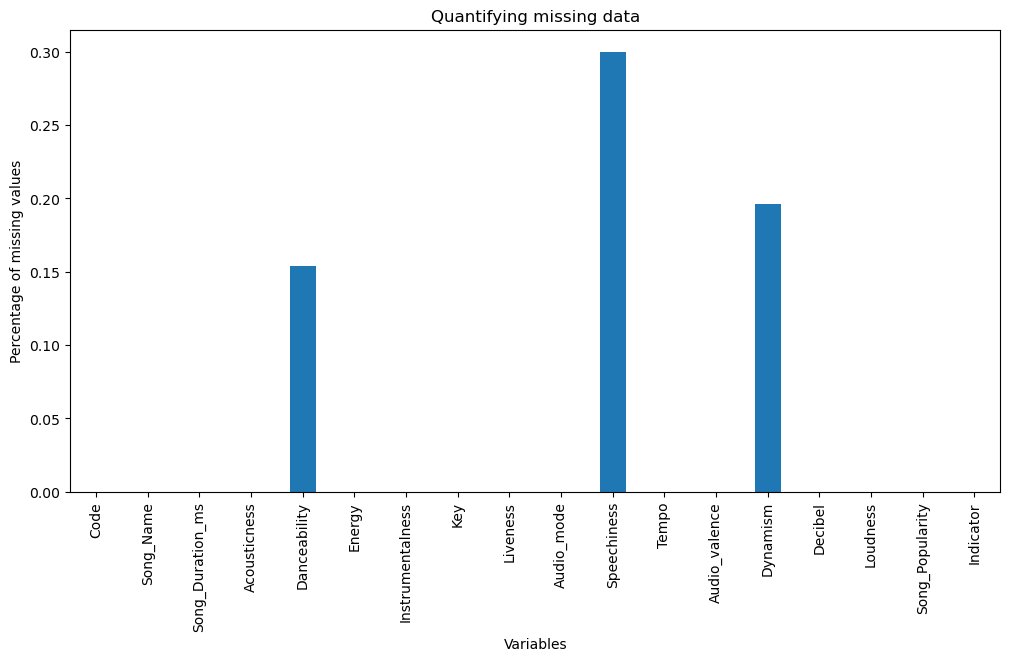

In [7]:
#Quantify missing data
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

<Axes: >

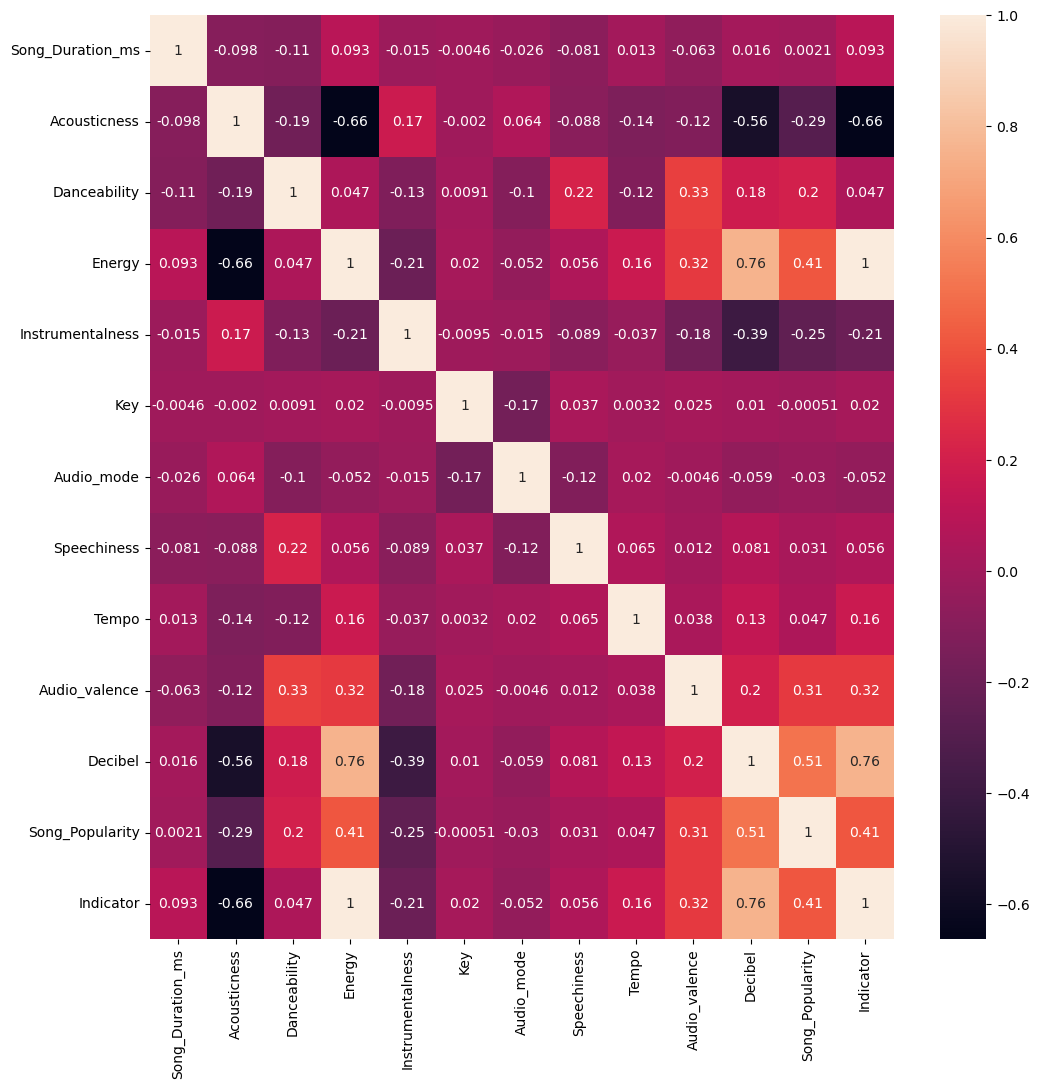

In [8]:
#Plot heatmap of correlated features
plt.figure(figsize=(12, 12))
sns.heatmap(data=data[num_cols].corr(), annot=True)

<Axes: >

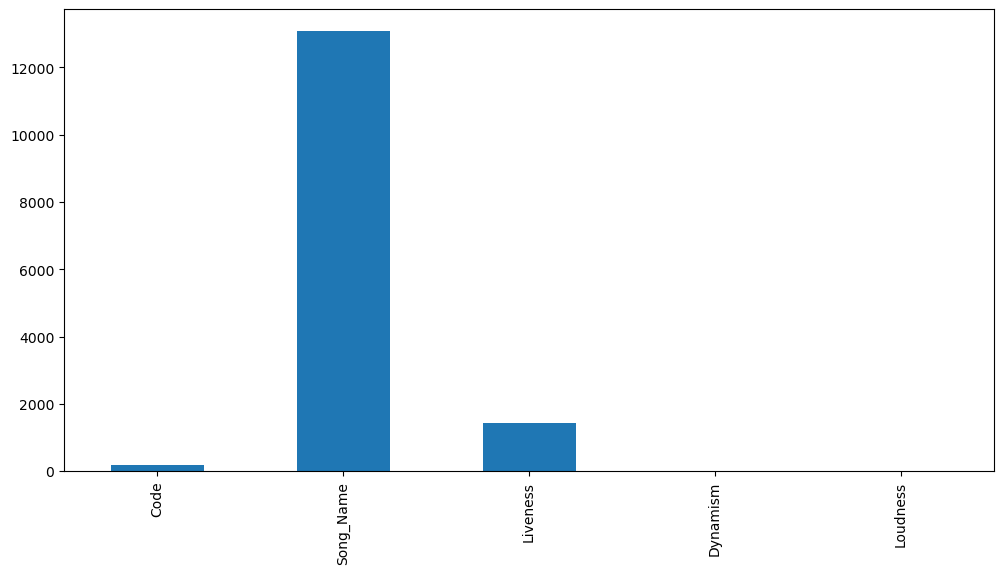

In [9]:
# Determining Cardinality
data[cat_cols].nunique().plot.bar(figsize=(12,6))

In [10]:
#Check values for categorical variables
data[cat_cols].nunique()

Code           186
Song_Name    13070
Liveness      1426
Dynamism        11
Loudness        19
dtype: int64

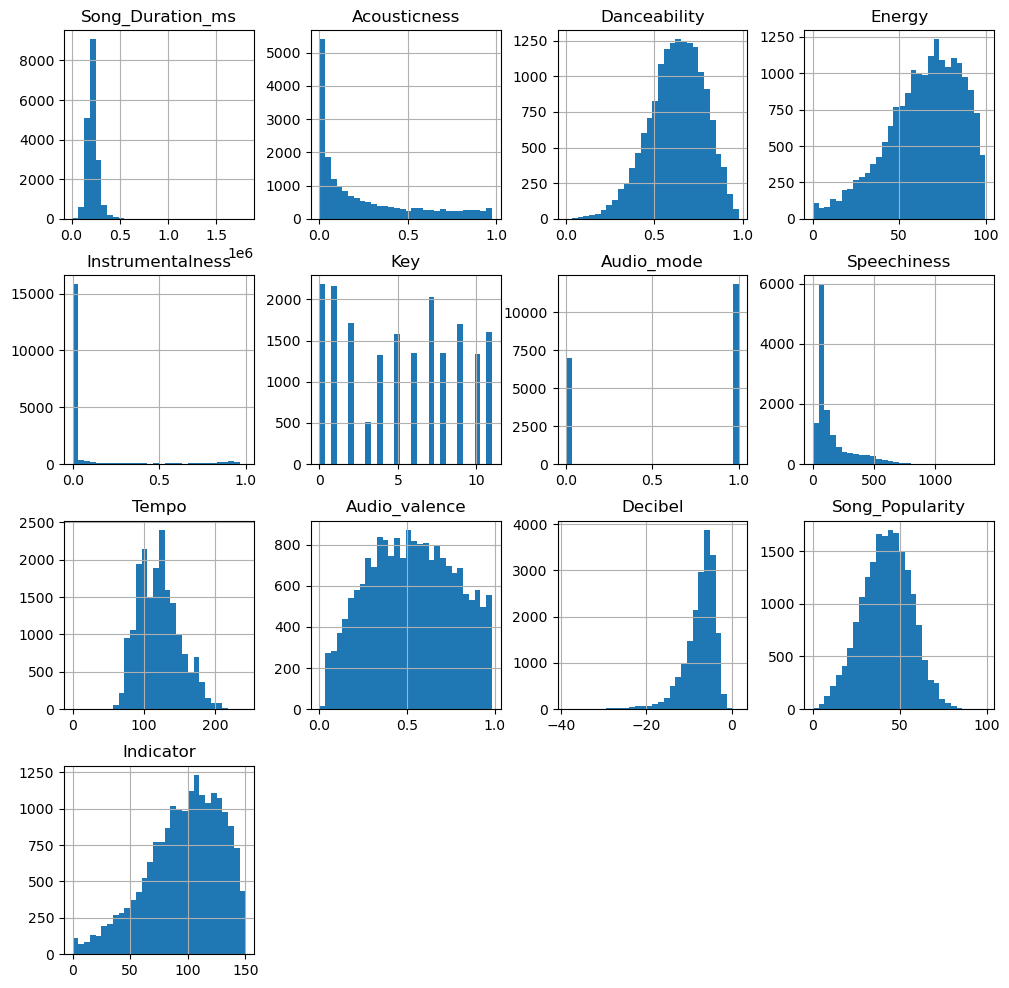

In [11]:
# distribution of numerical variables
data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

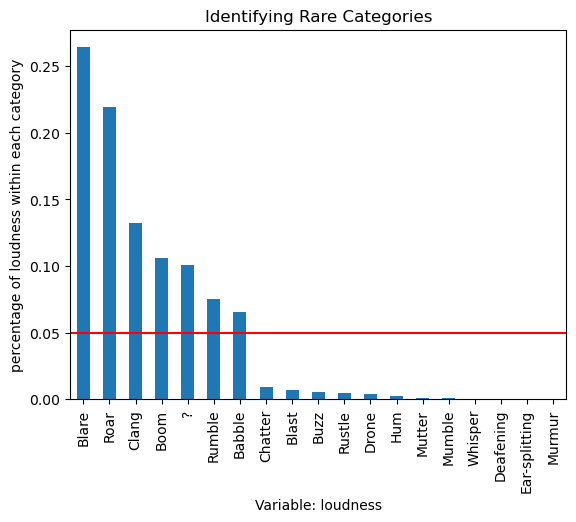

In [12]:
#Rare categories in Loudness 
fig = loudness_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of loudness within each category')
fig.set_xlabel('Variable: loudness')
fig.set_title('Identifying Rare Categories')
plt.show()

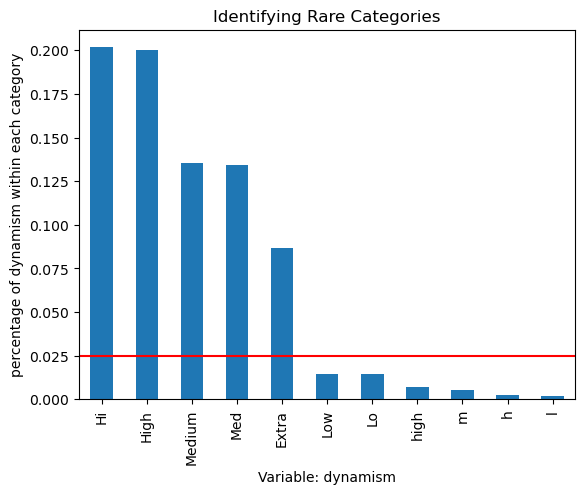

In [13]:
#Rare categories in dynamism
fig = dynamism_freq.sort_values(ascending=False).plot.bar()

fig.axhline(y=0.025, color='red')

# add axis labels and title
fig.set_ylabel('percentage of dynamism within each category')
fig.set_xlabel('Variable: dynamism')
fig.set_title('Identifying Rare Categories')
plt.show()

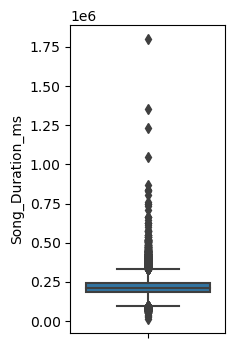

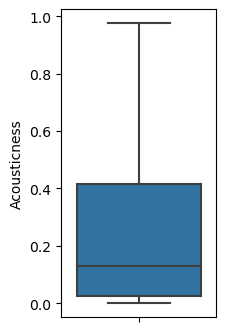

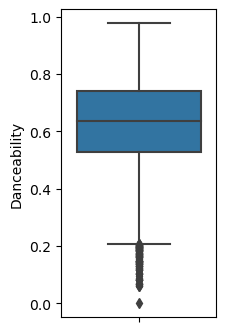

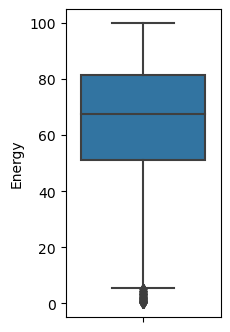

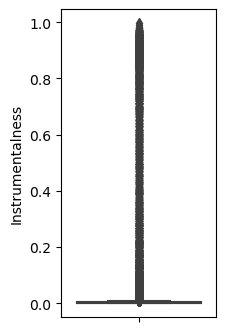

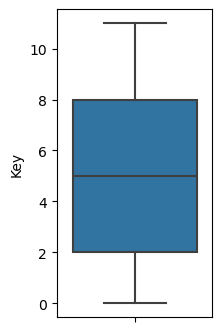

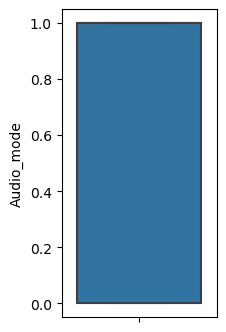

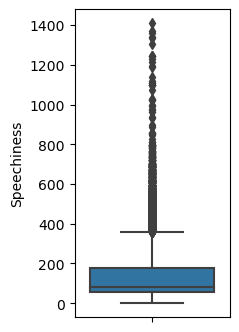

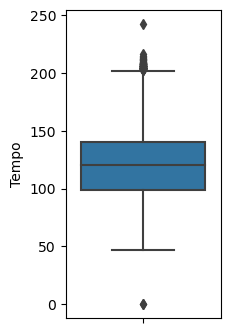

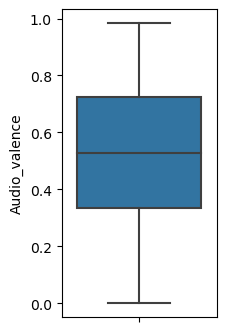

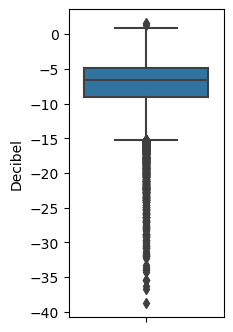

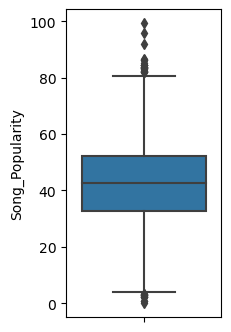

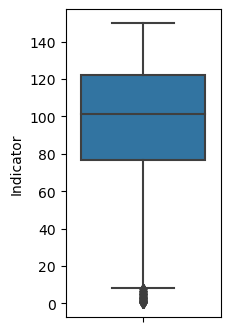

In [14]:
#Boxplots for all numerical variables
for i in num_cols:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=data[i])

### Step 3: Data Preprocessing

In [15]:
#Replace question marks with null values for loudness
data = data.replace('?', np.nan)
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


In [16]:
#After replacing '?' with nan there should be more null values found where loudness has null values now
data.isnull().sum()

Code                   0
Song_Name              0
Song_Duration_ms       0
Acousticness           0
Danceability        2897
Energy                 0
Instrumentalness       0
Key                    0
Liveness               1
Audio_mode             0
Speechiness         5651
Tempo                  0
Audio_valence          0
Dynamism            3698
Decibel                0
Loudness            1902
Song_Popularity        0
Indicator              0
dtype: int64

In [17]:
#Change Liveness to a numerical datatype then check for any values that are not numeric

data['Liveness'] = pd.to_numeric(data['Liveness'], errors='coerce')
non_numeric_rows = data[data['Liveness'].isna()]
non_numeric_rows

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
7,EI7,Are You Gonna Be My Girl,213800,0.00145,0.60687,95.3,0.000582,2,NaN,1,NaN,105.046,0.537,Extra,-3.435,Boom,62.55,142.95


<Axes: xlabel='Liveness', ylabel='Count'>

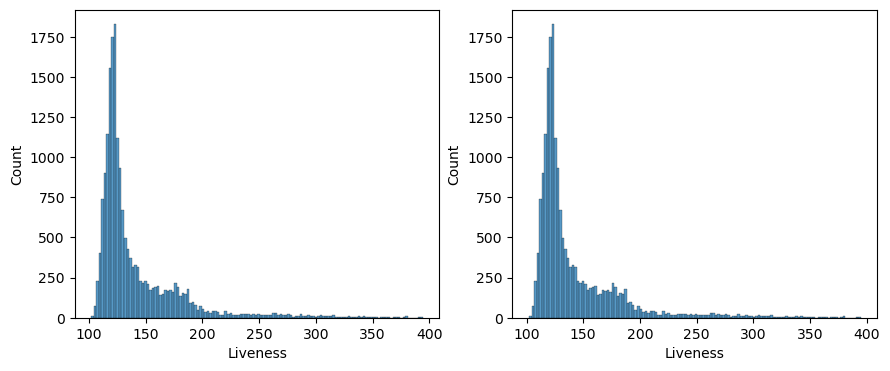

In [18]:
#See the distribution before and after dropping
plt.figure(figsize=(16, 4))
#Before
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Liveness')

#After
data = data.dropna(subset=['Liveness'])
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='Liveness')
#Dropping the row does not affect the distribution

In [19]:
#Replace error values in dynamism column
replacement_dict = {'Hi' : 'High', 'Med' : 'Medium', 'Lo':'Low', 'high' : 'High', 'Extra':'Extra high', 'm': 'Medium', 'h' : 'High', 'l':'Low'}
data['Dynamism'] = data['Dynamism'].replace(replacement_dict)

In [20]:
# #Check duplicates
data[data.duplicated()]

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
414,MI13,Hotel California - Remastered,391376,0.005625,0.57321,50.8,0.000494,2,111.830625,1,40.50,147.125,0.6090,Medium,-9.484,Clang,52.89,76.20
421,MI14,Me and Bobby McGee,271333,0.295960,0.44847,46.4,0.000060,2,132.710400,1,64.65,93.190,0.6580,Medium,-10.960,Rumble,44.57,69.60
655,HI10,You're The Inspiration - 2006 Remastered Version,229240,0.360640,0.57717,60.2,0.000000,11,148.840000,1,NaN,74.008,0.3880,High,-6.364,Roar,48.74,90.30
663,HI9,You Shook Me All Night Long,210173,0.002813,0.52668,76.7,0.000513,7,193.210000,1,86.10,127.361,0.7550,High,-5.509,Blare,59.82,115.05
672,MI17,Free Fallin',256000,0.214620,0.62370,44.9,0.000000,5,112.826884,1,37.80,84.378,0.6230,Medium,-13.243,Babble,44.17,67.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18752,MI14,Sense of Home,265840,0.874160,0.55935,20.7,0.000002,3,121.440400,1,48.00,140.068,0.0904,Medium,-10.926,Rumble,41.12,31.05
18763,MI13,Sweetest Thing,218502,0.686980,0.54054,41.1,0.000097,2,120.012025,1,71.25,79.785,0.5280,Medium,-9.308,Clang,43.40,61.65
18787,MI19,Vedauwoo,159102,0.873180,0.63657,21.3,0.001380,3,146.652100,1,48.60,137.709,0.1200,Medium,-15.584,Babble,32.50,31.95
18811,MI12,Oceans,216186,0.268520,0.39996,48.0,0.000009,9,128.142400,0,NaN,129.162,0.2000,Medium,-8.906,Clang,41.49,72.00


In [21]:
#Shape before
data.shape

(18834, 18)

In [22]:
# #Remove duplicates
data = data.drop_duplicates()
print(data.shape)

(17402, 18)


In [23]:
data.isnull().sum()

Code                   0
Song_Name              0
Song_Duration_ms       0
Acousticness           0
Danceability        2830
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         5370
Tempo                  0
Audio_valence          0
Dynamism            3597
Decibel                0
Loudness            1879
Song_Popularity        0
Indicator              0
dtype: int64

In [24]:
#Final display information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17402 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              17402 non-null  object 
 1   Song_Name         17402 non-null  object 
 2   Song_Duration_ms  17402 non-null  int64  
 3   Acousticness      17402 non-null  float64
 4   Danceability      14572 non-null  float64
 5   Energy            17402 non-null  float64
 6   Instrumentalness  17402 non-null  float64
 7   Key               17402 non-null  int64  
 8   Liveness          17402 non-null  float64
 9   Audio_mode        17402 non-null  int64  
 10  Speechiness       12032 non-null  float64
 11  Tempo             17402 non-null  float64
 12  Audio_valence     17402 non-null  float64
 13  Dynamism          13805 non-null  object 
 14  Decibel           17402 non-null  float64
 15  Loudness          15523 non-null  object 
 16  Song_Popularity   17402 non-null  float64
 17

In [25]:
data.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.766400,0,NaN,105.256,0.370,High,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.502500,1,118.80,123.881,0.324,Medium,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.440400,1,160.50,122.444,0.198,Extra high,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.876900,1,46.95,172.011,0.574,High,-5.065,Blare,46.68,114.90


In [26]:
#handle outliers for song popularity
windsorizer = Winsorizer(capping_method='quantiles', # choose iqr for skewed or gaussian for normal
                           tail='both', # cap left, right or both tails 
                           fold=0.05,
                           variables=['Song_Popularity'])

windsorizer.fit(data)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['Song_Popularity'])

In [27]:
data = windsorizer.transform(data)

<Axes: ylabel='Song_Popularity'>

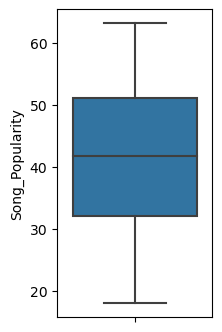

In [28]:
#Boxplot for outlier handling for song popularity
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Song_Popularity'])

In [29]:
#Drop song name column, code because they are redundant. Highly correlated features and indicators
data = data.drop(['Song_Name', 'Code', 'Energy', 'Indicator', 'Key', 'Audio_mode'], axis =1 )
data.head()

,Song_Duration_ms,Acousticness,Danceability,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity
0,262333,0.005410,0.49104,0.000029,112.126921,44.10,167.060,0.474,High,-4.095,Blare,57.72
1,216933,0.010094,0.53658,0.000000,122.766400,NaN,105.256,0.370,High,-6.407,Roar,45.37
2,231733,0.008007,0.72963,0.447000,157.502500,118.80,123.881,0.324,Medium,-7.828,Roar,47.28
3,216933,0.025872,0.44649,0.003550,121.440400,160.50,122.444,0.198,Extra high,-4.938,Blare,52.89
4,223826,0.000935,0.44253,0.000000,123.876900,46.95,172.011,0.574,High,-5.065,Blare,46.68


In [30]:
#Percentage of null values for each variable
data.isnull().mean()

Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.162625
Instrumentalness    0.000000
Liveness            0.000000
Speechiness         0.308585
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.206700
Decibel             0.000000
Loudness            0.107976
Song_Popularity     0.000000
dtype: float64

### Step 4: Train and Test Split

In [31]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Song_Popularity', axis=1), data['Song_Popularity'], test_size=0.3, random_state=69)

X_train.shape, X_test.shape

((12181, 11), (5221, 11))

In [32]:
y_train.shape, y_test.shape

((12181,), (5221,))

### Step 5: Missing Value Imputation

In [33]:
# % of missing data in X_train
X_train.isnull().mean()

Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.161399
Instrumentalness    0.000000
Liveness            0.000000
Speechiness         0.306953
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.208604
Decibel             0.000000
Loudness            0.109597
dtype: float64

In [34]:
#Summarise null values
X_train.isnull().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        1966
Instrumentalness       0
Liveness               0
Speechiness         3739
Tempo                  0
Audio_valence          0
Dynamism            2541
Decibel                0
Loudness            1335
dtype: int64

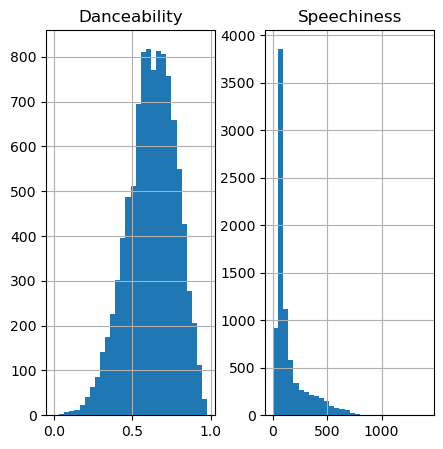

In [35]:
#Analyse distribution of variables with null values
X_train[['Danceability', 'Speechiness']].hist(bins=30, figsize=(5,5))
plt.show()

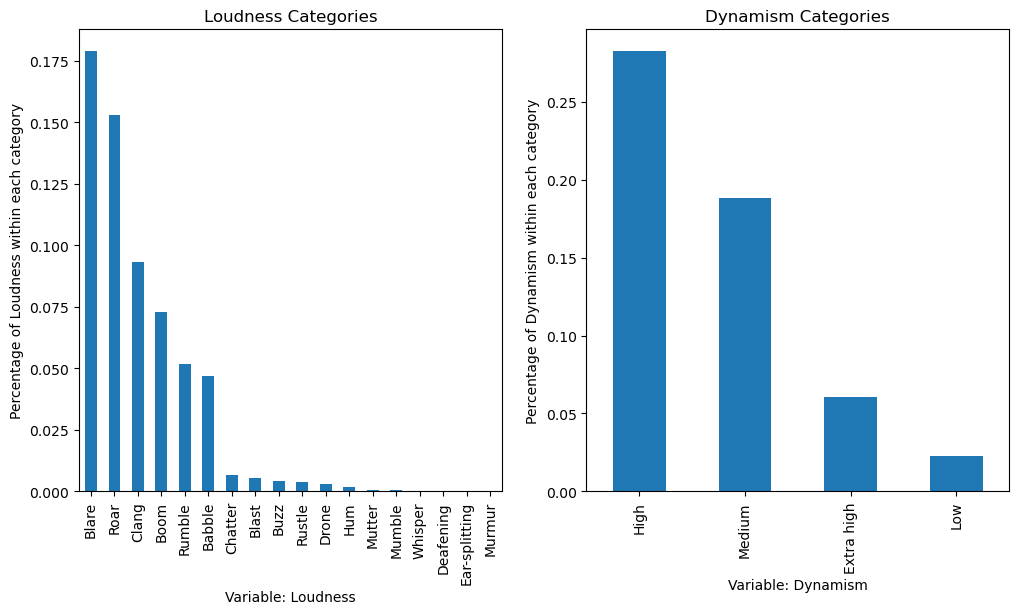

1335 nulls for loudness variable
2541 nulls for dynamism variable


In [36]:
#Analyzing distributions of categorical variables -Loudness before
loudness_freq_before = X_train['Loudness'].value_counts() / len(data)
dynamism_freq_before = X_train['Dynamism'].value_counts()/len(data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Loudness frequency
loudness_freq_before.sort_values(ascending=False).plot.bar(ax=ax1)
ax1.set_ylabel('Percentage of Loudness within each category')
ax1.set_xlabel('Variable: Loudness')
ax1.set_title('Loudness Categories')

# Plot Dynamism frequency
dynamism_freq_before.sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set_ylabel('Percentage of Dynamism within each category')
ax2.set_xlabel('Variable: Dynamism')
ax2.set_title('Dynamism Categories')
plt.show()
print(f"{X_train['Loudness'].isnull().sum()} nulls for loudness variable")
print(f"{X_train['Dynamism'].isnull().sum()} nulls for dynamism variable")


In [37]:
#Dancebility -> float 
#Speechniness -> float
#Dynaism -> categorical
#Loudness -> categorical
#Imputing numerical variables
# features_num_mean = ['Danceability'] 
# features_num_median = ['Speechiness']
# features_cat_frequent = ['Loudness']
# features_cat_missing = ['Dynamism']
# features_random = ['Danceability', 'Speechiness']

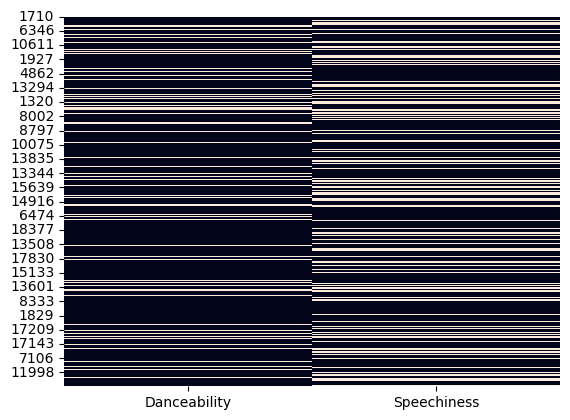

In [38]:
#Heatmap of missing data white means missing
sns.heatmap(X_train[['Danceability', 'Speechiness']].isnull(), cbar=False)
plt.show()

In [39]:
#Imputing numerical variables with random imputer to preserve distribution and fit the preprocessor
# pipe_imputer = Pipeline(steps=[
#     ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'mean', variables=features_num_mean)),
#     ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median))
#     ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent')),
#     ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing')),
#     ('imp_random_sample', mdi.RandomSampleImputer(random_state=0, variables=['Danceability', 'Speechiness']))
    
# ])
# pipe_imputer.fit(X_train)
random_imputer = RandomSampleImputer(random_state=0, variables=['Danceability', 'Speechiness'])

random_imputer.fit(X_train)

RandomSampleImputer(random_state=0, variables=['Danceability', 'Speechiness'])

In [40]:
# and now we impute the data
X_train = random_imputer.transform(X_train)
X_test = random_imputer.transform(X_test)
# X_train = pipe_imputer.transform(X_train)
# X_test = pipe_imputer.transform(X_test)



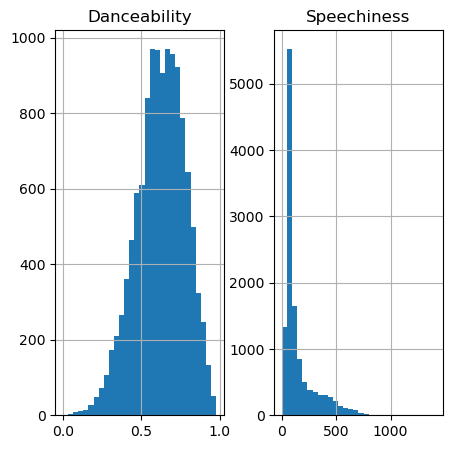

In [41]:
#Analyze their distributions you can see that replacing the nulls with the mean value skewed the distribution
X_train[['Danceability', 'Speechiness']].hist(bins=30, figsize=(5,5))
plt.show()

In [42]:
#Identify if there is a relationship between categorical variables with the other numerical variables through performing chi square test
#Null hypothesis: there is no relationship
#Alternate hypothesis: there is a relationship
#significance level is 0.05

#Perform chi square test for dynamism variable 

exclude_lst = ['Instrumentalness']
num_cols = [c for c in X_train.columns if X_train[c].dtypes != 'O' and c not in exclude_lst]

def chi_square_test(variable, categorical_variable):
    variable_bins = pd.qcut(X_train[variable], q=X_train[categorical_variable].nunique())
    contingency_table = pd.crosstab(X_train[categorical_variable], variable_bins)
    result = chi2_contingency(contingency_table)
    print(f"{variable}: {result.pvalue}")
    
#Perform chi square test for dynamism variable
print("Dynamism p values")
for i in num_cols:
    chi_square_test(i, 'Dynamism')

print()
print("Loudness p values")
for i in num_cols:
    chi_square_test(i, 'Loudness')
  

Dynamism p values
Song_Duration_ms: 5.189582150938709e-32
Acousticness: 0.0
Danceability: 1.7239254723411792e-75
Liveness: 8.665495915277193e-122
Speechiness: 9.823366975941234e-52
Tempo: 5.645776487860829e-61
Audio_valence: 7.252225146608791e-201
Decibel: 0.0

Loudness p values
Song_Duration_ms: 1.3660227430690796e-78
Acousticness: 0.0
Danceability: 9.779246001000376e-52
Liveness: 9.90974795161092e-43
Speechiness: 7.56864934612423e-27
Tempo: 2.2010800859579197e-84
Audio_valence: 3.6880943179553055e-127
Decibel: 0.0


In [43]:
#explore relationship with decibel and dynamism/loudness
print("Decibel groupings")
print(X_train.groupby('Dynamism')['Decibel'].max().sort_values(ascending=False))
print()
print(X_train.groupby('Loudness')['Decibel'].max().sort_values(ascending=False))
print()
print()
print("Acousticness groupings")
print(X_train.groupby('Dynamism')['Acousticness'].max().sort_values())
print()
print(X_train.groupby('Loudness')['Acousticness'].max().sort_values())


Decibel groupings
Dynamism
Extra high    1.585
High         -0.257
Medium       -1.624
Low          -6.873
Name: Decibel, dtype: float64

Loudness
Ear-splitting     1.585
Deafening         0.878
Blast            -0.257
Boom             -2.010
Blare            -4.001
Roar             -6.002
Clang            -8.003
Rumble          -10.004
Babble          -12.004
Chatter         -16.009
Buzz            -18.014
Drone           -20.046
Rustle          -22.008
Hum             -25.055
Mutter          -28.088
Mumble          -31.607
Whisper         -35.389
Murmur          -38.768
Name: Decibel, dtype: float64


Acousticness groupings
Dynamism
Extra high    0.79674
High          0.96628
Medium        0.97412
Low           0.97608
Name: Acousticness, dtype: float64

Loudness
Ear-splitting    0.010192
Deafening        0.024598
Blast            0.746760
Boom             0.807520
Blare            0.921200
Roar             0.942760
Clang            0.958440
Murmur           0.968240
Chatter         

In [44]:
#create new feature combining the acousticness and decibel since acousticness has duplicates to make ranges more unique and capture more information which can be used to impute the null values later
X_train['Decibel_Acousticness'] = X_train['Decibel'] * X_train['Acousticness']
X_test['Decibel_Acousticness'] = X_test['Decibel'] * X_test['Acousticness']
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Decibel_Acousticness
1710,199000,0.020188,0.95634,0.000004,114.811225,151.5,108.011,0.767,NaN,-6.392,Roar,-0.129042
14367,227379,0.334180,0.62568,0.000102,137.592900,490.5,164.053,0.847,High,-6.196,Roar,-2.070579
18084,207626,0.021854,0.63162,0.000000,119.180889,96.6,92.939,0.660,High,-5.540,Blare,-0.121071
9497,290826,0.155820,0.56133,0.826000,130.873600,46.8,125.713,0.458,High,-7.471,Roar,-1.164131
18459,233832,0.028714,0.71874,0.010100,121.881600,184.5,97.985,0.733,High,-5.043,Blare,-0.144805


In [45]:
Dynamism_cats = X_train.groupby('Dynamism')['Decibel_Acousticness'].max().sort_values(ascending=False)

Loudness_cats = X_train.groupby('Loudness')['Decibel_Acousticness'].max().sort_values(ascending=False)


print(Dynamism_cats)
print()
print(Loudness_cats)

Dynamism
Extra high    0.015844
High         -0.000010
Medium       -0.000108
Low          -0.100476
Name: Decibel_Acousticness, dtype: float64

Loudness
Ear-splitting     0.015844
Deafening         0.003124
Boom             -0.000004
Blare            -0.000004
Roar             -0.000019
Clang            -0.000020
Blast            -0.000027
Babble           -0.000150
Rumble           -0.000199
Chatter          -0.006507
Rustle           -0.010586
Buzz             -0.051514
Drone            -0.081331
Hum              -0.425754
Mutter          -25.902192
Mumble          -30.295002
Whisper         -34.542495
Murmur          -37.536728
Name: Decibel_Acousticness, dtype: float64


In [46]:
#create dictionaries of threshholds key is the category name and value is the threshold interval

Dynamism_dict = {}
Loudness_dict = {}
Dynamism_thresholds = sorted(pd.qcut(X_train["Decibel_Acousticness"], q=X_train["Dynamism"].nunique()).unique(),reverse=True)
Loudness_thresholds = sorted(pd.qcut(X_train["Decibel_Acousticness"], q=X_train["Loudness"].nunique()).unique(),reverse=True)
for Category, Bins in zip(Dynamism_cats.index, Dynamism_thresholds) :
    Dynamism_dict[Category] = Bins
for Category, Bins in zip(Loudness_cats.index, Loudness_thresholds):
    Loudness_dict[Category] = Bins
print(Dynamism_dict)
print(Loudness_dict)

{'Extra high': Interval(-0.131, 0.0158, closed='right'), 'High': Interval(-0.82, -0.131, closed='right'), 'Medium': Interval(-3.149, -0.82, closed='right'), 'Low': Interval(-37.538, -3.149, closed='right')}
{'Ear-splitting': Interval(-0.00357, 0.0158, closed='right'), 'Deafening': Interval(-0.0183, -0.00357, closed='right'), 'Boom': Interval(-0.0495, -0.0183, closed='right'), 'Blare': Interval(-0.097, -0.0495, closed='right'), 'Roar': Interval(-0.166, -0.097, closed='right'), 'Clang': Interval(-0.265, -0.166, closed='right'), 'Blast': Interval(-0.402, -0.265, closed='right'), 'Babble': Interval(-0.586, -0.402, closed='right'), 'Rumble': Interval(-0.82, -0.586, closed='right'), 'Chatter': Interval(-1.103, -0.82, closed='right'), 'Rustle': Interval(-1.439, -1.103, closed='right'), 'Buzz': Interval(-1.975, -1.439, closed='right'), 'Drone': Interval(-2.694, -1.975, closed='right'), 'Hum': Interval(-3.707, -2.694, closed='right'), 'Mutter': Interval(-5.147, -3.707, closed='right'), 'Mumble'

In [47]:
#Function checks each row if dynamsim or loudness column is null then checks if the decibel_acousticness value is in which threshold before imputing the null with the key  
def impute_null_category(row):
    if pd.isnull(row['Dynamism']):
        for category, threshold in Dynamism_dict.items():
            if row['Decibel_Acousticness'] in threshold:
                row['Dynamism'] = category
                break
    if pd.isnull(row['Loudness']):
        for category, threshold in Loudness_dict.items():
            if row['Decibel_Acousticness'] in threshold:
                row['Loudness'] = category
                break
    return row

X_train = X_train.apply(impute_null_category, axis = 1)
X_test = X_test.apply(impute_null_category, axis = 1)


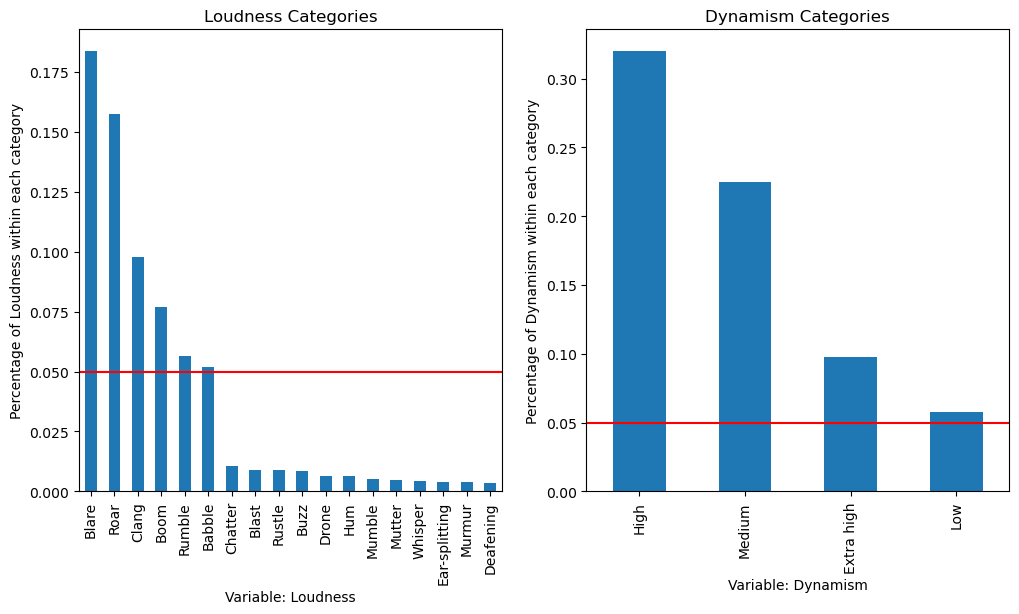

In [48]:
#Analyzing distributions of categorical variables -Loudness before
loudness_freq_after = X_train['Loudness'].value_counts() / len(data)
dynamism_freq_after = X_train['Dynamism'].value_counts()/len(data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Loudness frequency
loudness_freq_after.sort_values(ascending=False).plot.bar(ax=ax1)
ax1.set_ylabel('Percentage of Loudness within each category')
ax1.set_xlabel('Variable: Loudness')
ax1.set_title('Loudness Categories')
ax1.axhline(y=0.05, color='red')

# Plot Dynamism frequency
dynamism_freq_after.sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set_ylabel('Percentage of Dynamism within each category')
ax2.set_xlabel('Variable: Dynamism')
ax2.set_title('Dynamism Categories')
ax2.axhline(y=0.05, color='red')

plt.show()

In [49]:
#no more nulls
X_train.isnull().sum()

Song_Duration_ms        0
Acousticness            0
Danceability            0
Instrumentalness        0
Liveness                0
Speechiness             0
Tempo                   0
Audio_valence           0
Dynamism                0
Decibel                 0
Loudness                0
Decibel_Acousticness    0
dtype: int64

### Step 6: Categorical Data Encoding

In [50]:
#earlier in my eda i saw that there were a lot of rare categories in the loudness variable so ill jus group them up

In [51]:
#assume anything below 5% is considered a rare category

temp = data['Loudness'].value_counts() / len(data)
rare = temp[temp < 0.05].index.values

X_train['Loudness'] = np.where(X_train['Loudness'].isin(rare), 'Rare', X_train['Loudness'])

X_test['Loudness'] = np.where(X_test['Loudness'].isin(rare), 'Rare', X_test['Loudness'])
X_train['Loudness'].value_counts() / len(X_train)

Loudness
Blare     0.262294
Roar      0.224940
Clang     0.139972
Boom      0.109597
Rare      0.108448
Rumble    0.080864
Babble    0.073886
Name: count, dtype: float64

In [52]:
#Encode categorical variables
# mean_enc = MeanEncoder(variables=['Loudness'])
# mean_enc.fit(X_train, y_train)
ohe_enc = OneHotEncoder(
     top_categories=None,
     variables=['Dynamism', 'Loudness'],
     drop_last=True) 
ohe_enc.fit(X_train)
# ordinal_enc = OrdinalEncoder(
#      encoding_method='arbitrary',
#      variables=['Dynamism', 'Loudness'])
# ordinal_enc.fit(X_train)

# ordinal_enc = OrdinalEncoder(
#      encoding_method='ordered')

# ordinal_enc.fit(X_train, y_train)


OneHotEncoder(drop_last=True, variables=['Dynamism', 'Loudness'])

In [53]:
#ordinal_enc.encoder_dict_
#count_enc.encoder_dict_
#ordinal_enc.encoder_dict_

In [54]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)
# X_train = mean_enc.transform(X_train)
# X_test = mean_enc.transform(X_test)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)
# X_train = count_enc.transform(X_train)
# X_test = count_enc.transform(X_test)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)


In [55]:
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Decibel,Decibel_Acousticness,Dynamism_Extra high,Dynamism_High,Dynamism_Medium,Loudness_Roar,Loudness_Blare,Loudness_Boom,Loudness_Clang,Loudness_Babble,Loudness_Rumble
1710,199000,0.020188,0.95634,0.000004,114.811225,151.5,108.011,0.767,-6.392,-0.129042,1,0,0,1,0,0,0,0,0
14367,227379,0.334180,0.62568,0.000102,137.592900,490.5,164.053,0.847,-6.196,-2.070579,0,1,0,1,0,0,0,0,0
18084,207626,0.021854,0.63162,0.000000,119.180889,96.6,92.939,0.660,-5.540,-0.121071,0,1,0,0,1,0,0,0,0
9497,290826,0.155820,0.56133,0.826000,130.873600,46.8,125.713,0.458,-7.471,-1.164131,0,1,0,1,0,0,0,0,0
18459,233832,0.028714,0.71874,0.010100,121.881600,184.5,97.985,0.733,-5.043,-0.144805,0,1,0,0,1,0,0,0,0


In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 1710 to 4148
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Song_Duration_ms      12181 non-null  int64  
 1   Acousticness          12181 non-null  float64
 2   Danceability          12181 non-null  float64
 3   Instrumentalness      12181 non-null  float64
 4   Liveness              12181 non-null  float64
 5   Speechiness           12181 non-null  float64
 6   Tempo                 12181 non-null  float64
 7   Audio_valence         12181 non-null  float64
 8   Decibel               12181 non-null  float64
 9   Decibel_Acousticness  12181 non-null  float64
 10  Dynamism_Extra high   12181 non-null  int32  
 11  Dynamism_High         12181 non-null  int32  
 12  Dynamism_Medium       12181 non-null  int32  
 13  Loudness_Roar         12181 non-null  int32  
 14  Loudness_Blare        12181 non-null  int32  
 15  Loudness_Boom         

### Step 7: Capping/Trimming

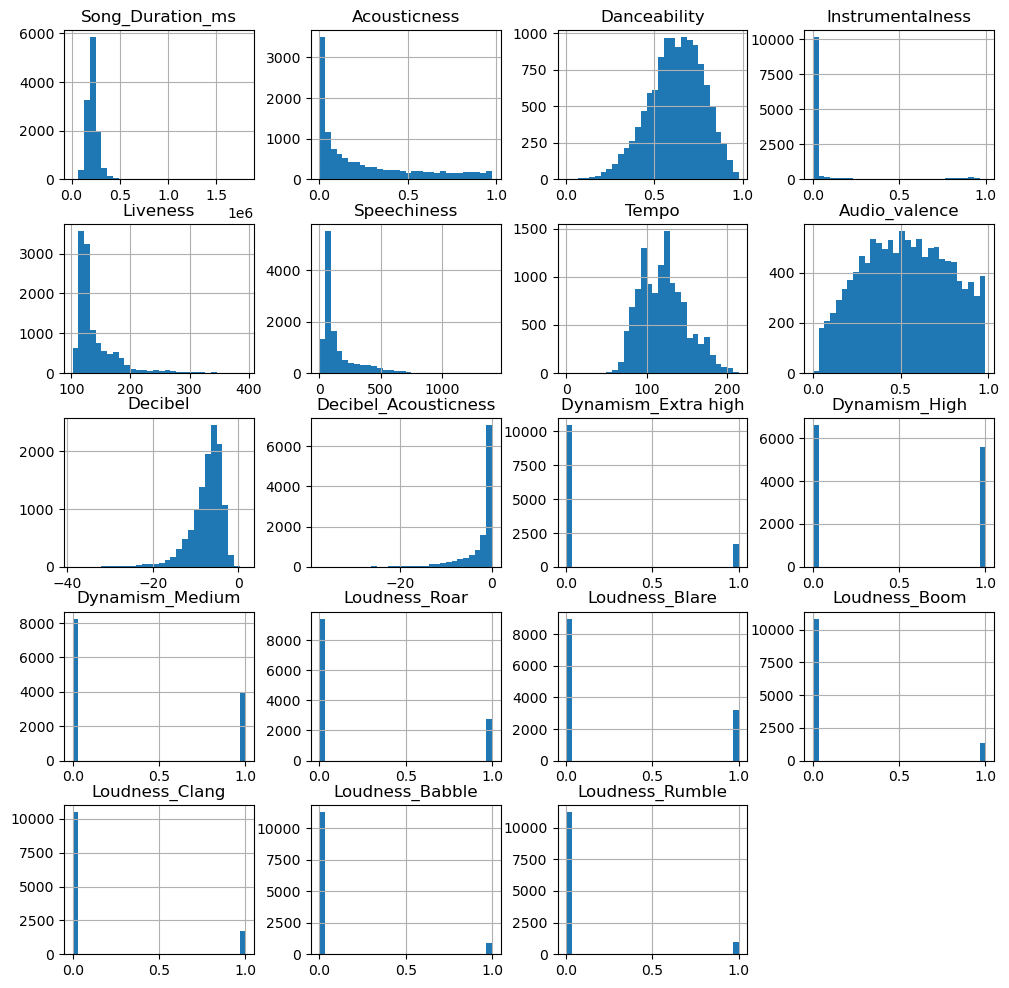

In [57]:
#Display distributions
X_train[[c for c in X_train.columns if X_train[c].dtypes !='O']].hist(bins=30, figsize=(12,12))
plt.show()

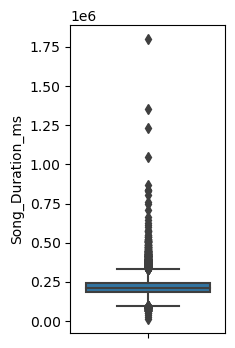

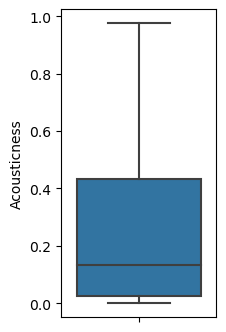

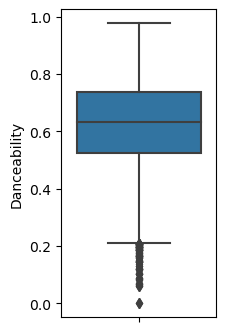

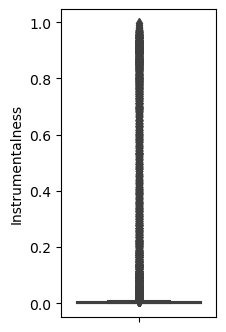

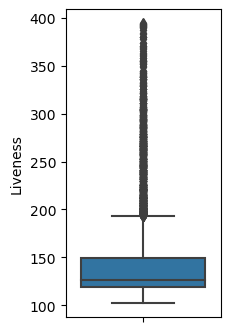

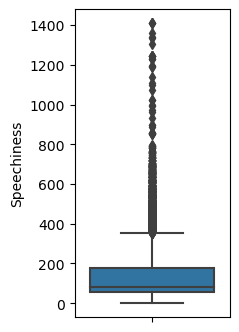

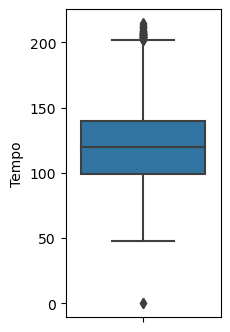

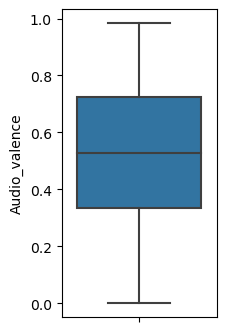

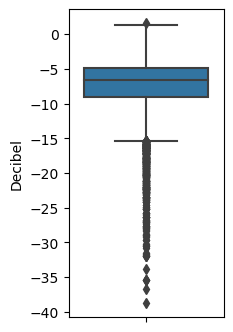

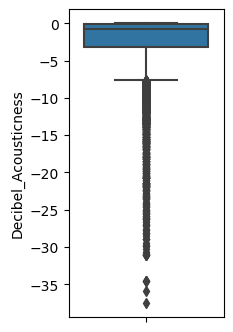

In [58]:
#Analyse boxplots
variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo', 'Audio_valence', 'Decibel', 'Decibel_Acousticness']
for i in variables:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=X_train[i])

In [59]:
#Cap tempo at 5 and 95 percentile
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['Tempo'])

windsorizer.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['Tempo'])

In [60]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

In [61]:
#cap daceability at left side since it has outliers at that part
windsorizer_normal = Winsorizer(capping_method ='gaussian', 
                        tail='left', # cap left, right or both tails
                        fold =3,
                        variables=['Danceability'])

windsorizer_normal.fit(X_train)

Winsorizer(tail='left', variables=['Danceability'])

In [62]:
X_train = windsorizer_normal.transform(X_train)
X_test = windsorizer_normal.transform(X_test)

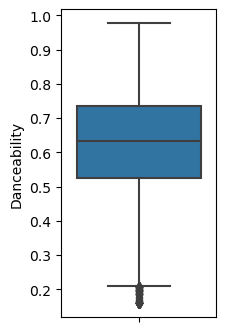

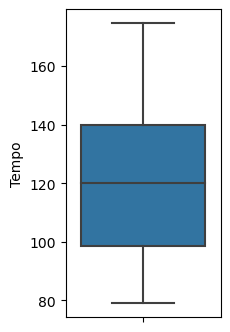

In [63]:
#Visualise boxplot after
variables = ['Danceability', 'Tempo']
for i in variables:
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=X_train[i])

### Step 8: Transformation

In [64]:
X_train.describe()

,Song_Duration_ms,Acousticness,Danceability,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Decibel,Decibel_Acousticness,Dynamism_Extra high,Dynamism_High,Dynamism_Medium,Loudness_Roar,Loudness_Blare,Loudness_Boom,Loudness_Clang,Loudness_Babble,Loudness_Rumble
count,1.218100e+04,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.00000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,2.188822e+05,0.258478,0.623070,0.082644,140.898014,150.808579,120.963852,0.527997,-7.487534,-2.548990,0.139151,0.456941,0.321566,0.22494,0.262294,0.109597,0.139972,0.073886,0.080864
std,6.215097e+04,0.286730,0.153865,0.227463,38.092241,154.625198,27.153188,0.245604,3.844588,4.095310,0.346118,0.498163,0.467097,0.41756,0.439900,0.312399,0.346972,0.261595,0.272637
min,1.200000e+04,0.000001,0.159768,0.000000,102.191881,0.000000,79.013000,0.000000,-38.768000,-37.536728,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.843330e+05,0.023814,0.524700,0.000000,119.355625,56.100000,98.649000,0.335000,-9.108000,-3.148801,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.116660e+05,0.132300,0.632610,0.000014,125.888400,81.900000,120.028000,0.527000,-6.607000,-0.819525,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.434250e+05,0.431200,0.736560,0.003500,148.840000,175.500000,139.956000,0.726000,-4.928000,-0.130690,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.799346e+06,0.976080,0.977130,0.997000,394.419600,1410.000000,174.682000,0.984000,1.585000,0.015844,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
#Display histogram and qq plots before transformation
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable, fontsize=14)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

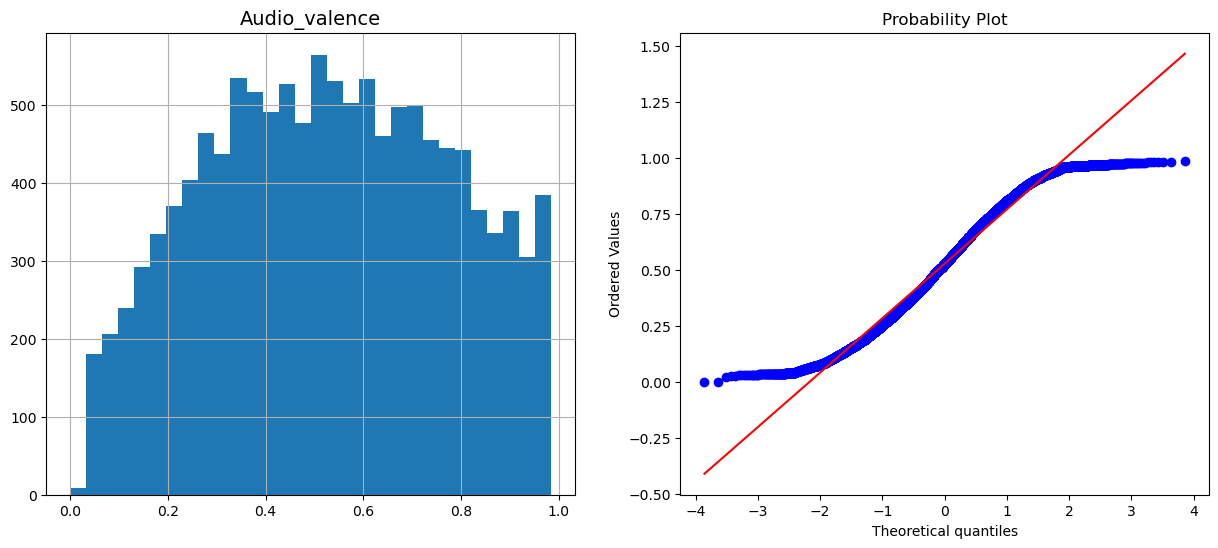

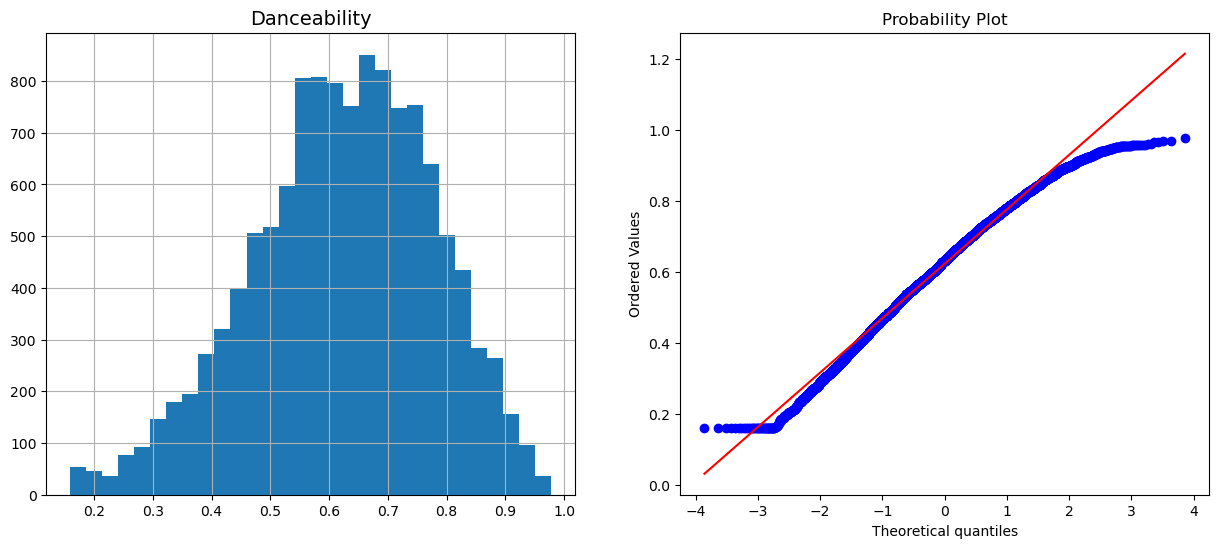

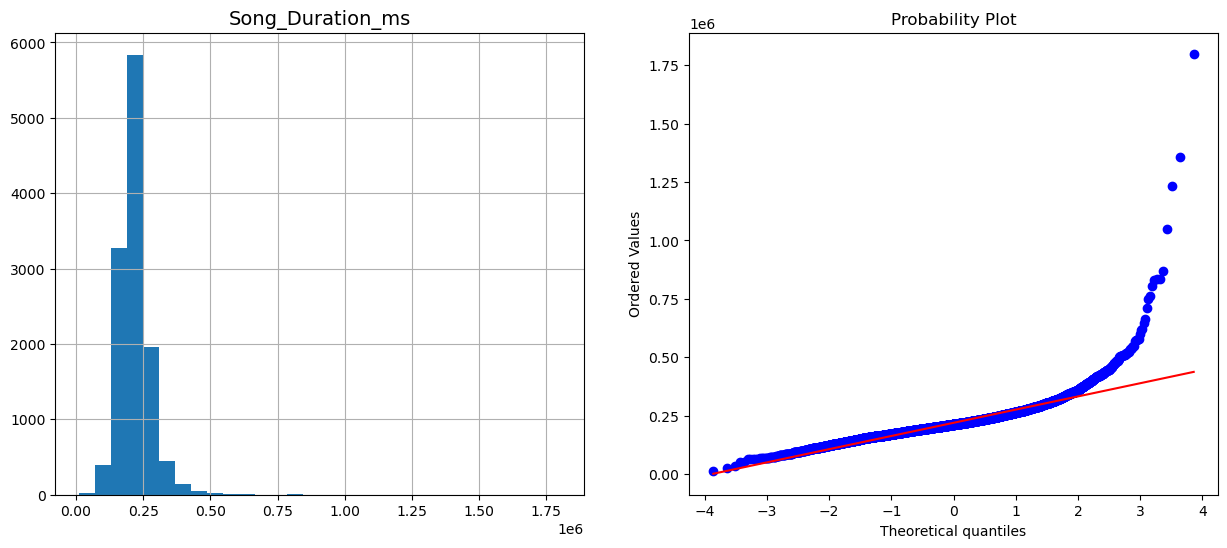

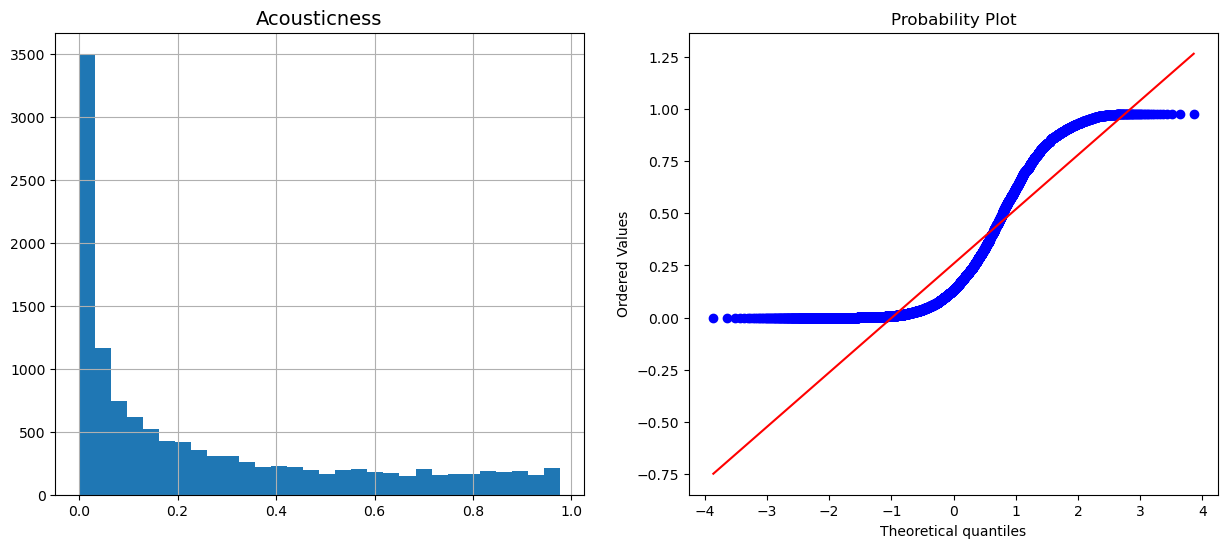

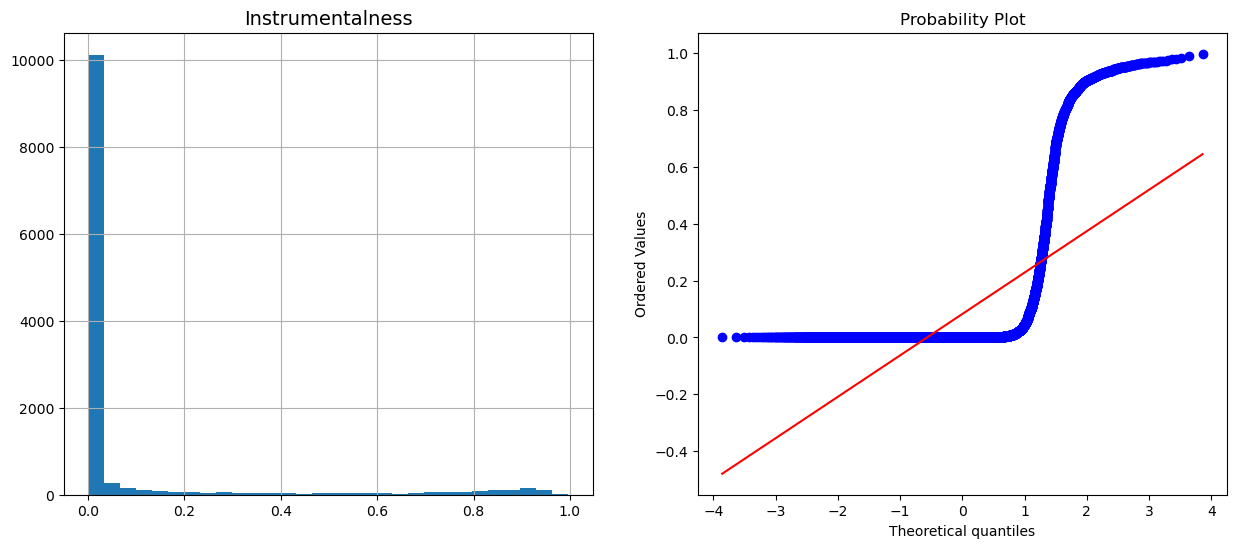

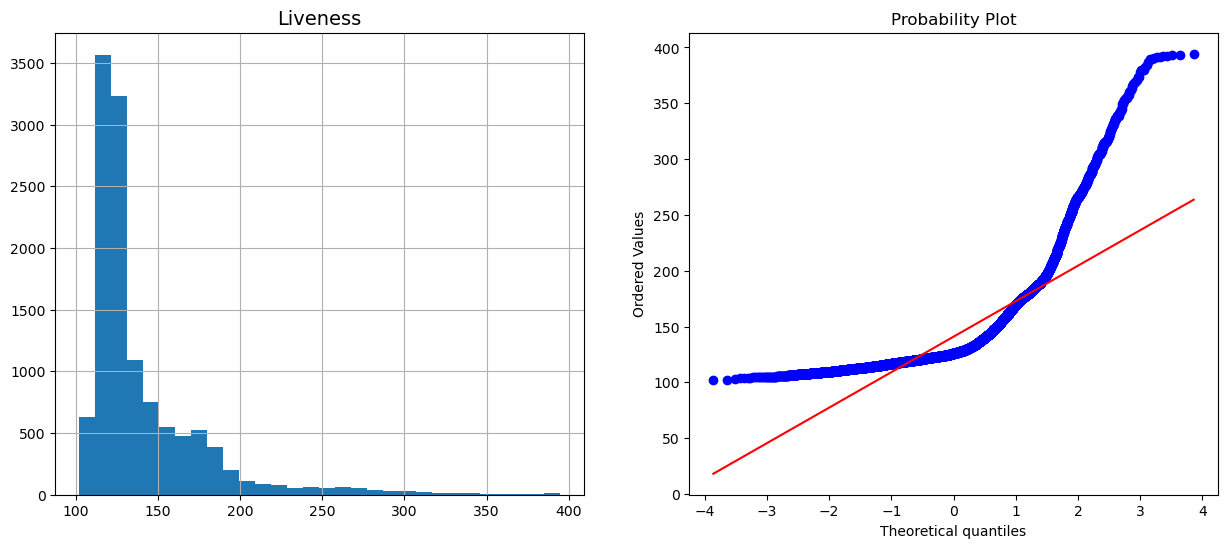

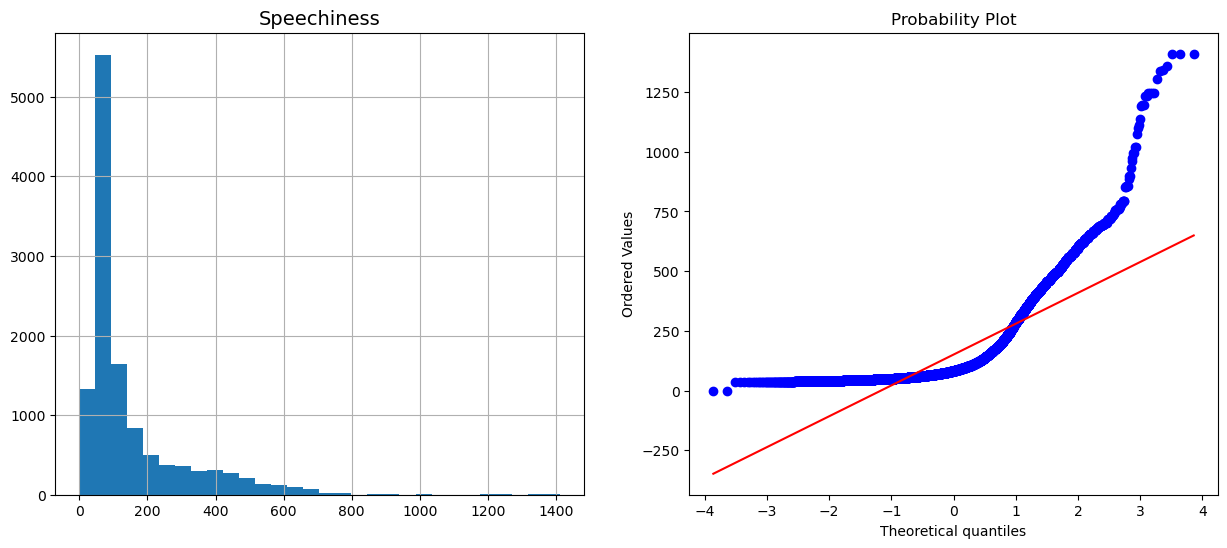

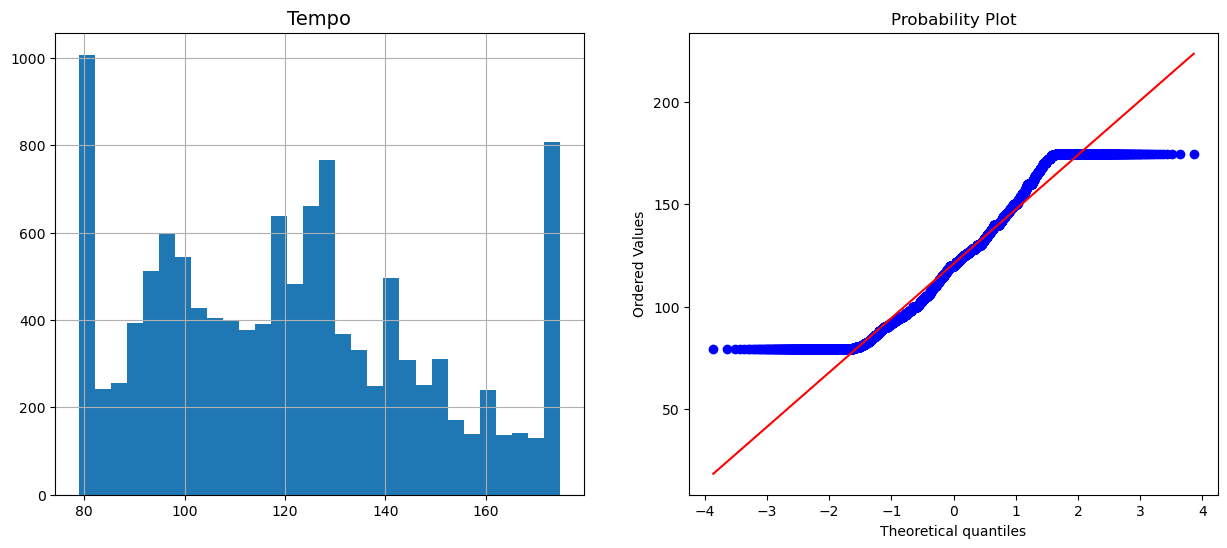

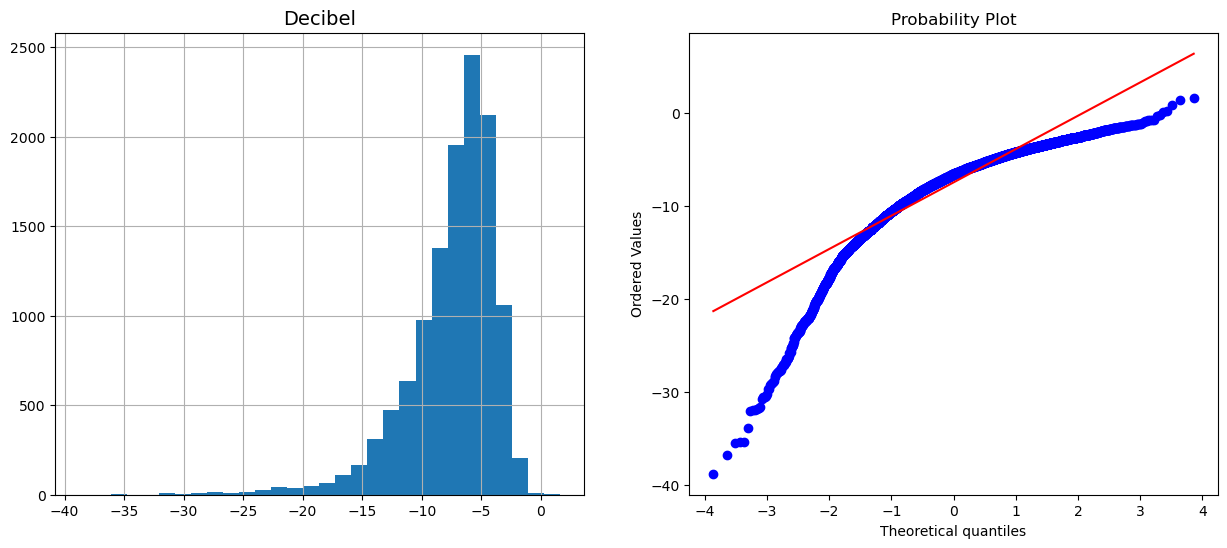

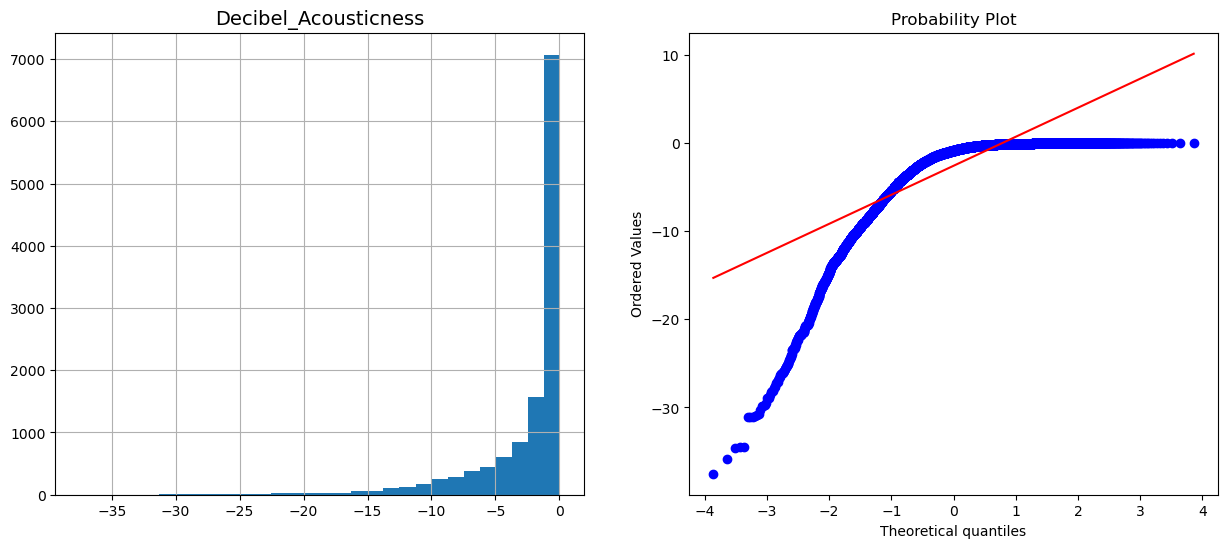

In [66]:
# variables that have a skewed distribution require stronger transformation, yeo johnson transformation will handle the negative values


#Did not transform decibel since it deid not affect its distribution 
variables = ['Audio_valence', 'Danceability', 'Song_Duration_ms', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo','Decibel', 'Decibel_Acousticness']
for i in variables:
    diagnostic_plots(X_train, i)

In [67]:
yjt = YeoJohnsonTransformer(variables = ['Tempo', 'Decibel', 'Decibel_Acousticness'])

# fit transformer to the dataframe
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['Tempo', 'Decibel', 'Decibel_Acousticness'])

In [68]:
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

In [69]:
#Log transformation add a very small amount to handle the instrumentalness
#appling 
# apply log to a set of variables
X_train[['Instrumentalness', 'Acousticness', 'Liveness', 'Song_Duration_ms']] = np.log(
X_train[['Instrumentalness', 'Acousticness', 'Liveness', 'Song_Duration_ms']] + 0.001)

X_test[['Instrumentalness', 'Acousticness', 'Liveness', 'Song_Duration_ms']] = np.log(
X_test[['Instrumentalness', 'Acousticness', 'Liveness', 'Song_Duration_ms']] + 0.001)

In [70]:
# et = PowerTransformer(variables = ['Acousticness', 'Liveness', 'Speechiness'], exp=0.3)

# # fit transformer to data
# et.fit(X_train)
#power transformation only managed to provide little improvement to how well the variable fit the qq plot for extemly right skewed variables so i used a stronger transformation

In [71]:
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

In [72]:
# # initialize the transformer
# rt = ReciprocalTransformer(variables = ['Decibel_Acousticness'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)
#Reciprocal transform is incredibly strong transformer and skewed the distribution by a large amount even thought the variable was skewed by default

In [73]:
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

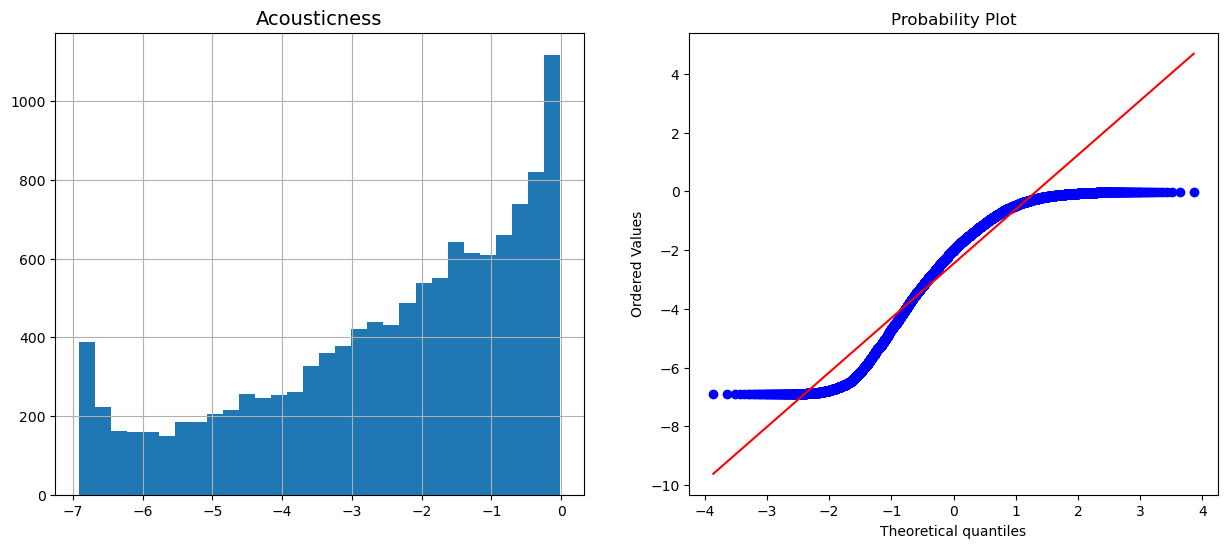

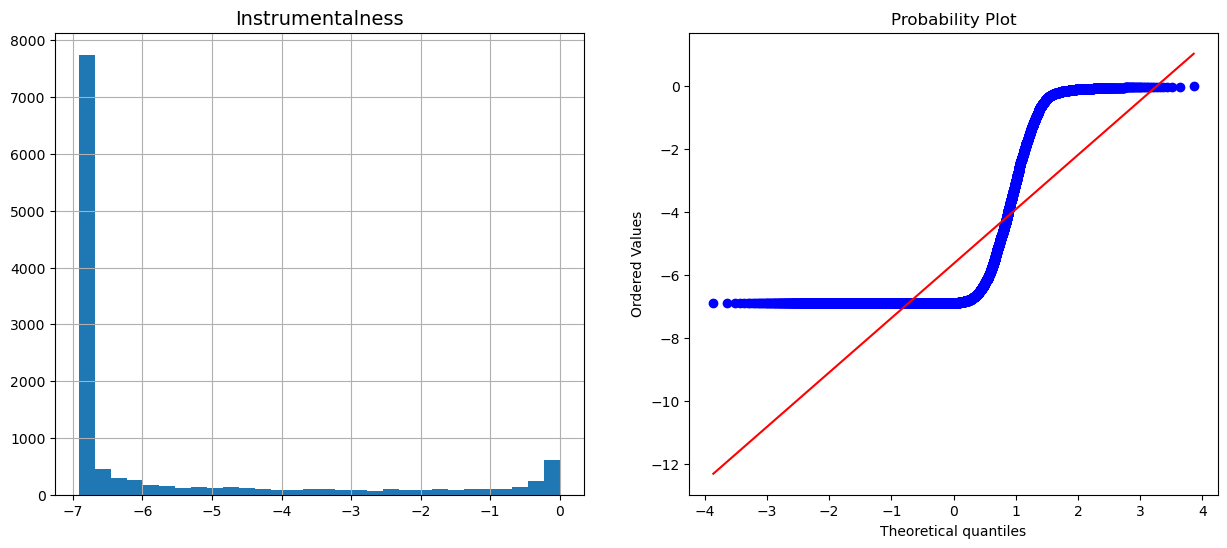

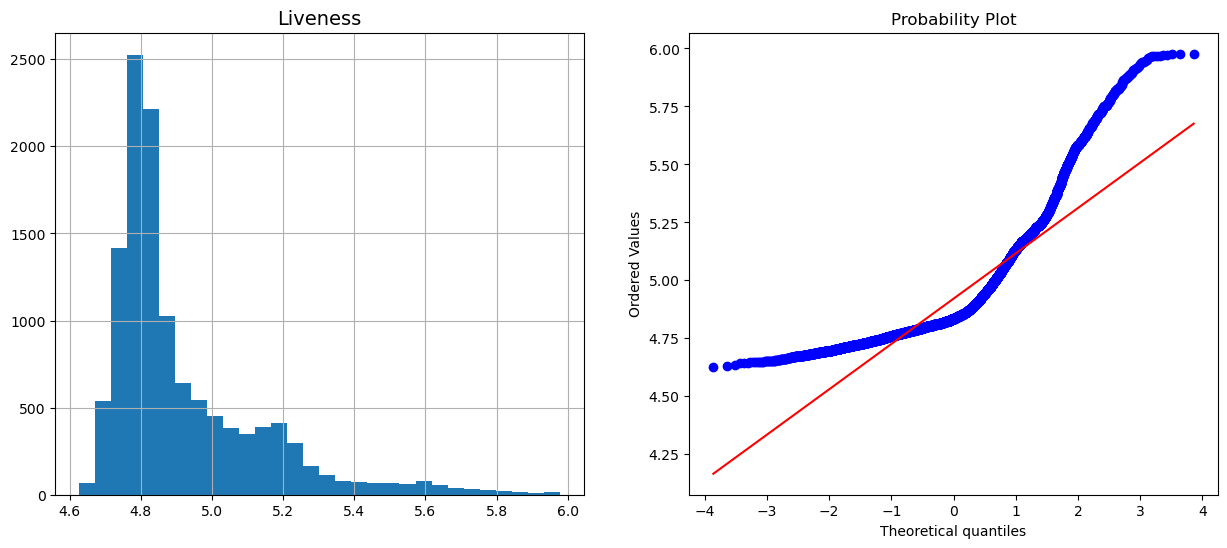

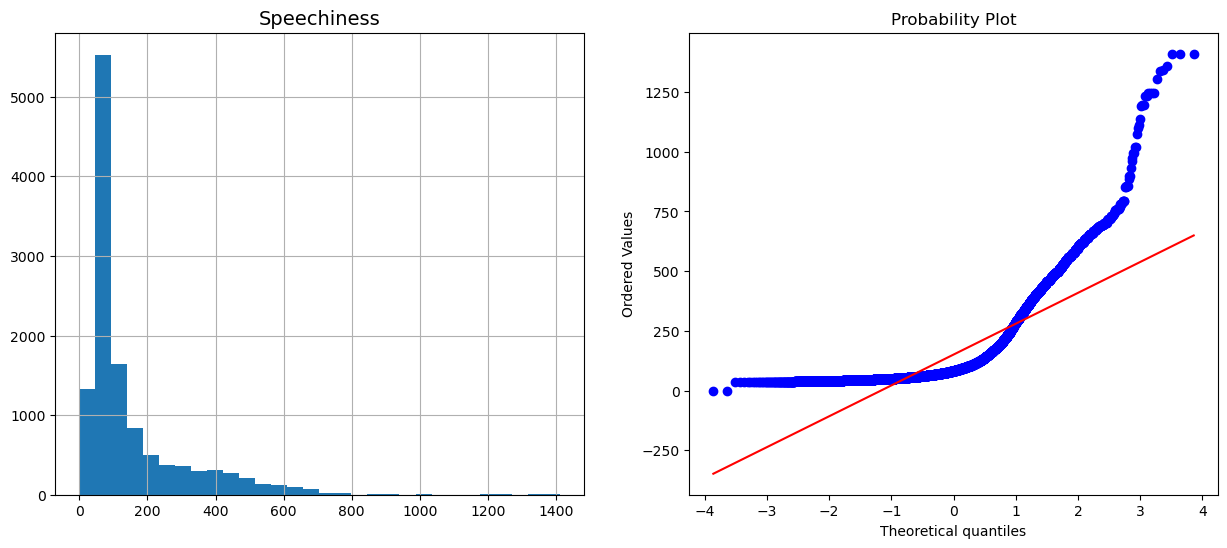

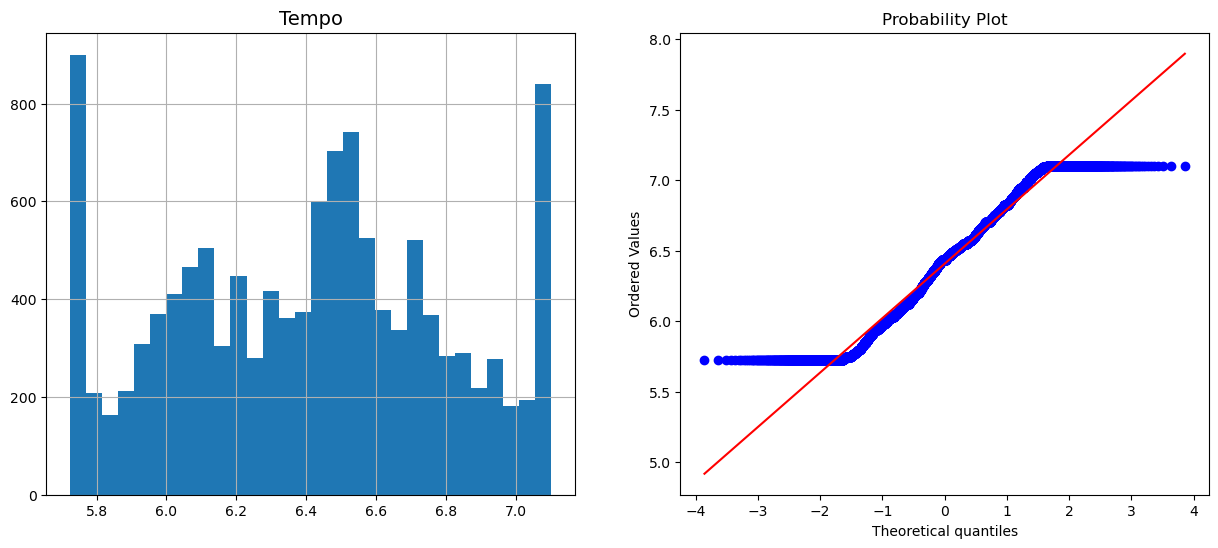

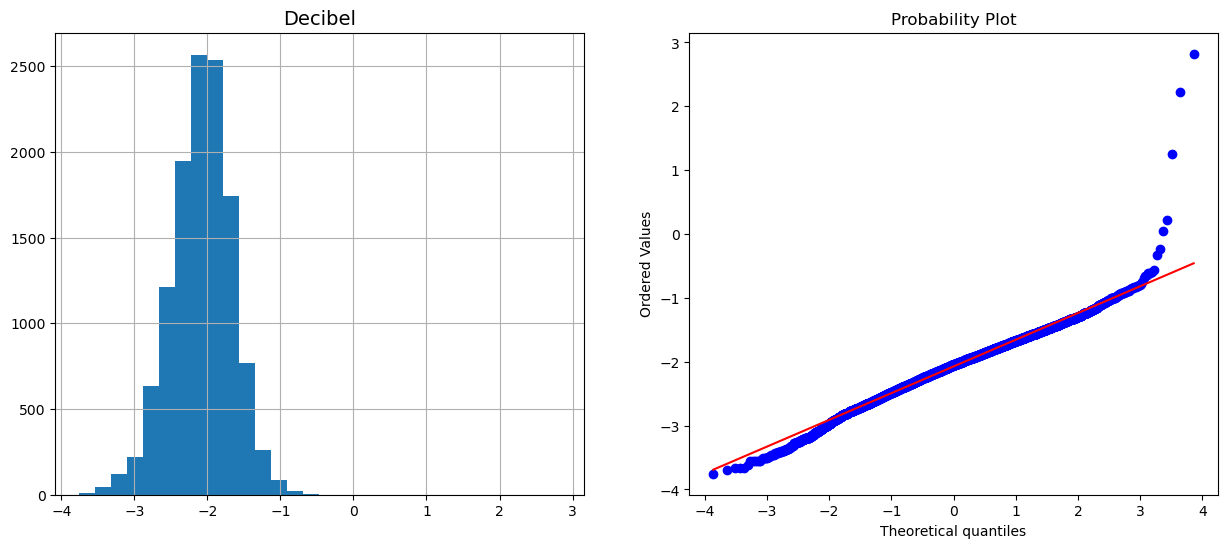

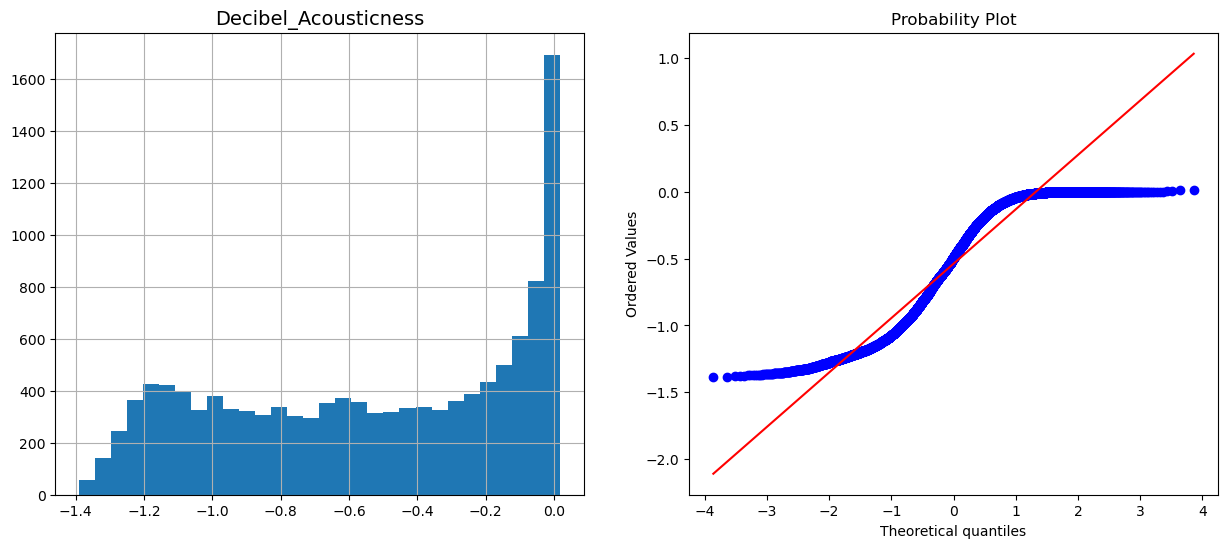

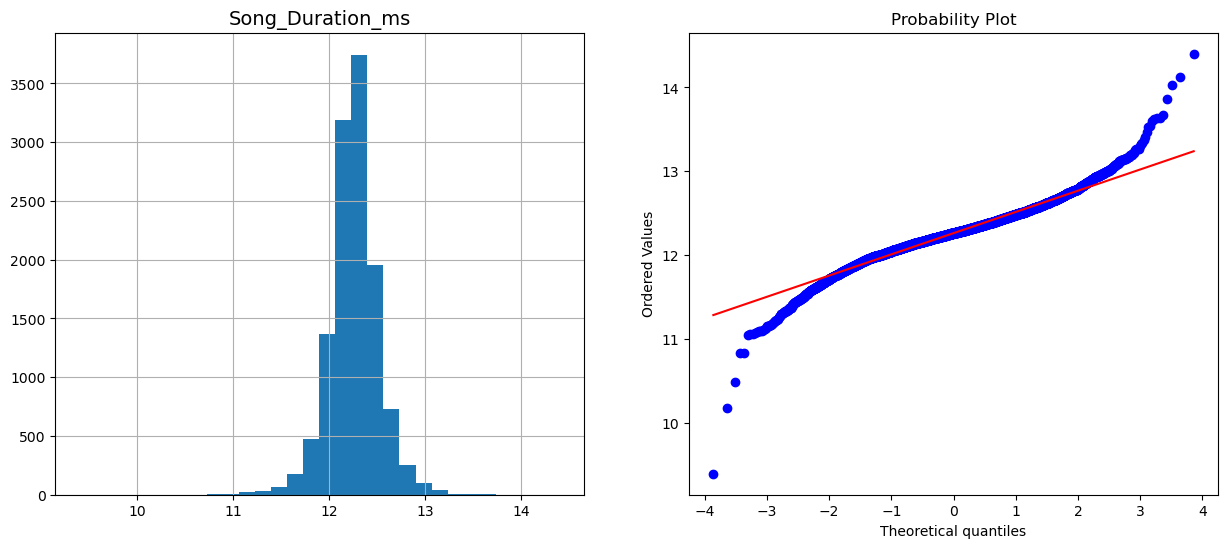

In [74]:
#review distributions after
variables = ['Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo','Decibel', 'Decibel_Acousticness', 'Song_Duration_ms']
for i in variables:
    diagnostic_plots(X_train, i)

### Step 8: Binning/Discretezition

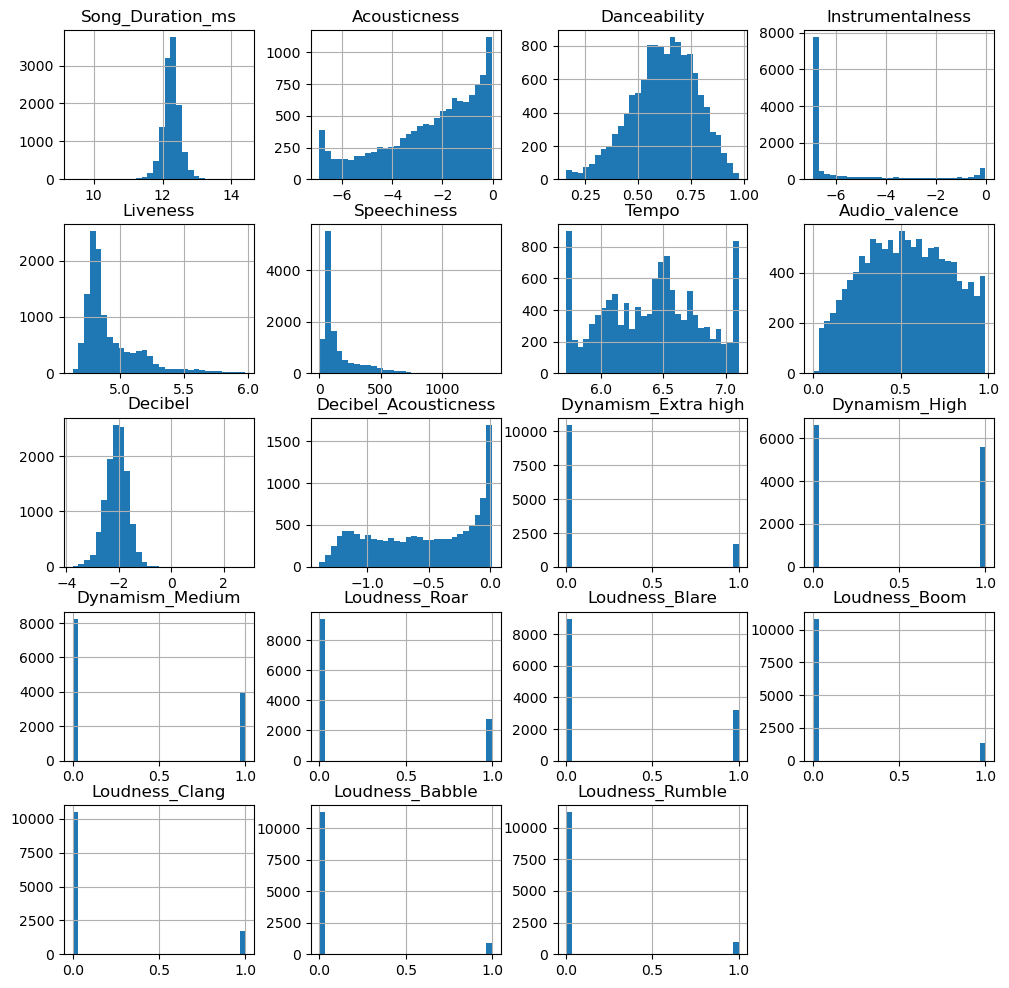

In [75]:
#Observe distributions
X_train[[c for c in X_train.columns if X_train[c].dtypes !='O']].hist(bins=30, figsize=(12,12))
plt.show()

In [76]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['Instrumentalness', 'Acousticness', 'Decibel_Acousticness'])

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['Instrumentalness', 'Acousticness',
                                     'Decibel_Acousticness'])

In [77]:
disc.binner_dict_

{'Instrumentalness': [-inf,
  -6.9058770439703645,
  -6.893655154603356,
  -6.798004415023017,
  -6.185049296180647,
  -4.29768548624013,
  -1.2039728043259361,
  inf],
 'Acousticness': [-inf,
  -5.569443907884398,
  -4.238723144900656,
  -3.2898349138086944,
  -2.600910269544308,
  -2.015153051797474,
  -1.5117668852606543,
  -1.061432117543826,
  -0.6216454588712345,
  -0.2802431433547825,
  inf],
 'Decibel_Acousticness': [-inf,
  -1.1570031371015392,
  -1.0069330586632343,
  -0.8371650034098739,
  -0.6562981829641579,
  -0.4953509056613056,
  -0.32022343354776917,
  -0.17434371577097835,
  -0.07192649326814841,
  -0.014614161554410459,
  inf]}

In [78]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [79]:
# X_train = disc_equal.transform(X_train)
# X_test = disc_equal.transform(X_test)
#most of the variables have skewed distributions making equal width binning impossible to implement

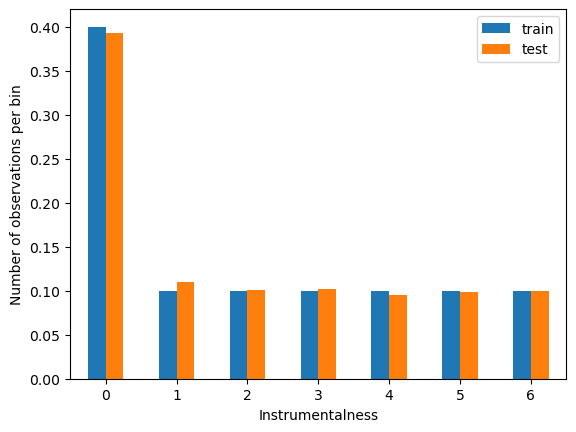

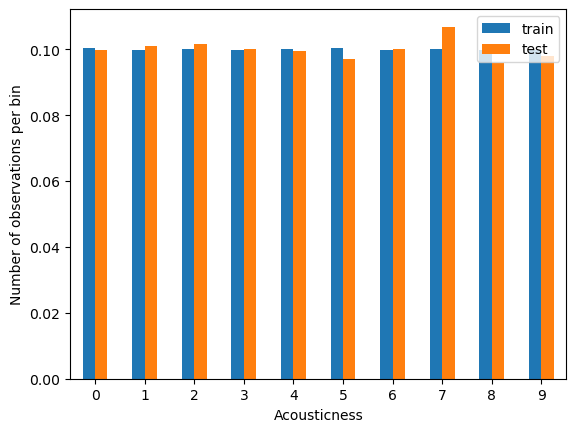

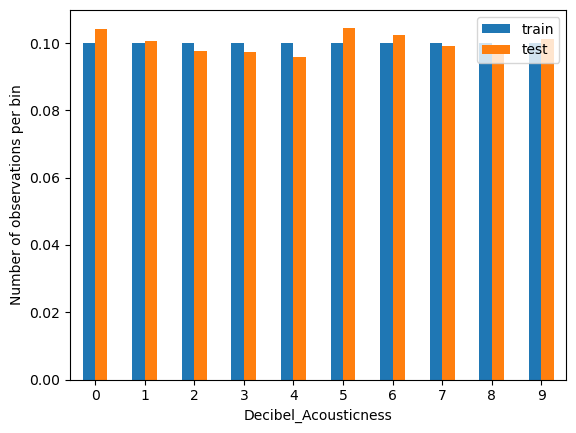

In [80]:
#Observe distribution of binned continuous variables 
#it seems that Instrumentalness and Speechiness columns have very similiar distributions after binning so i will keep them and i will bin acousticness wth equal width because its distribution is very spread out too
#variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo', 'Audio_valence', 'Decibel']
variables = ['Instrumentalness', 'Acousticness', 'Decibel_Acousticness']
for i in variables:
    t1 = X_train.groupby([i])[i].count() / len(X_train)
    t2 = X_test.groupby([i])[i].count() / len(X_test)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

### Step 9: Scaling/Normalization

In [81]:
X_train.describe()

,Song_Duration_ms,Acousticness,Danceability,Instrumentalness,Liveness,Speechiness,Tempo,Audio_valence,Decibel,Decibel_Acousticness,Dynamism_Extra high,Dynamism_High,Dynamism_Medium,Loudness_Roar,Loudness_Blare,Loudness_Boom,Loudness_Clang,Loudness_Babble,Loudness_Rumble
count,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.00000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,12.262551,4.498235,0.623070,2.099335,4.920989,150.808579,6.408058,0.527997,-2.074803,4.499466,0.139151,0.456941,0.321566,0.22494,0.262294,0.109597,0.139972,0.073886,0.080864
std,0.258083,2.872342,0.153865,2.165557,0.217423,154.625198,0.391735,0.245604,0.421908,2.872571,0.346118,0.498163,0.467097,0.41756,0.439900,0.312399,0.346972,0.261595,0.272637
min,9.392662,0.000000,0.159768,0.000000,4.626862,0.000000,5.725005,0.000000,-3.754497,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.124499,2.000000,0.524700,0.000000,4.782116,56.100000,6.096222,0.335000,-2.341375,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.262765,4.000000,0.632610,1.000000,4.835404,81.900000,6.433044,0.527000,-2.050626,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.402564,7.000000,0.736560,4.000000,5.002879,175.500000,6.702595,0.726000,-1.796256,7.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,14.402934,9.000000,0.977130,6.000000,5.977418,1410.000000,7.100637,0.984000,2.822957,9.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


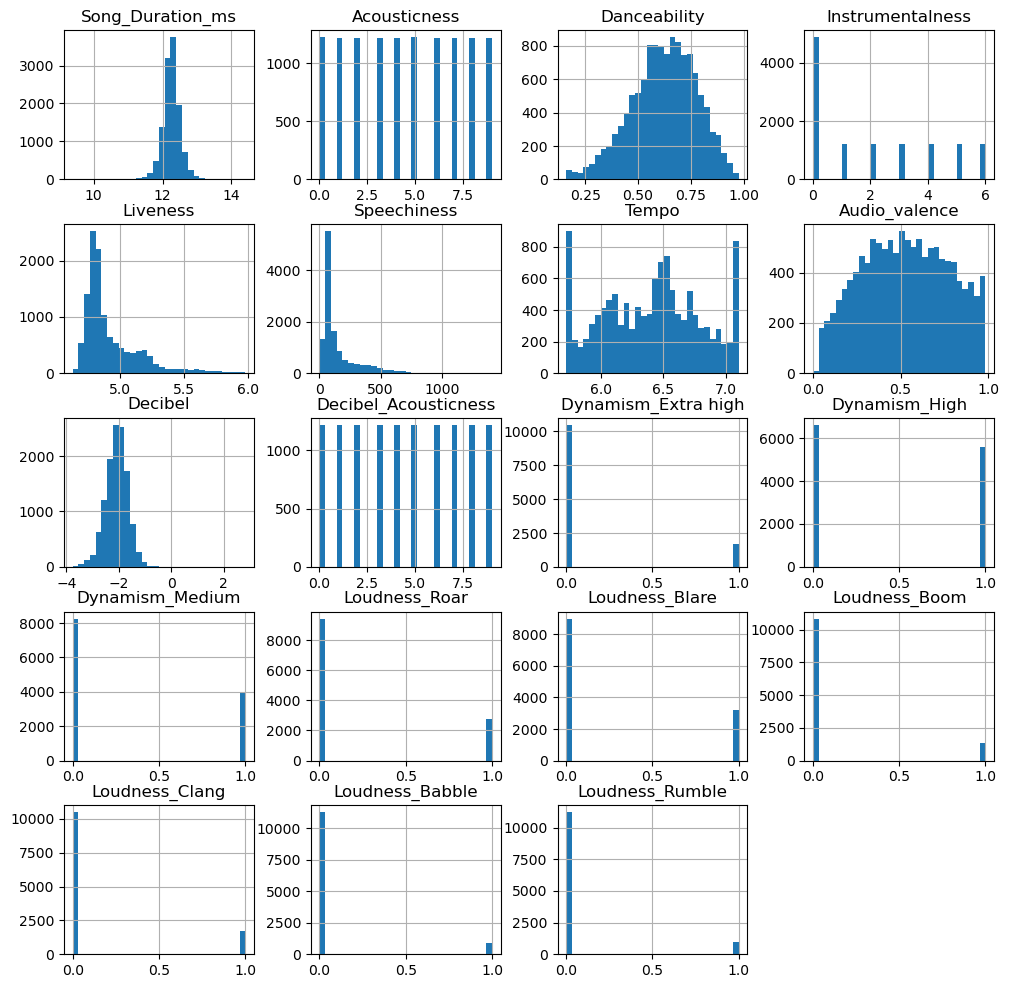

In [82]:
X_train[[c for c in X_train.columns if X_train[c].dtypes !='O']].hist(bins=30, figsize=(12,12))
plt.show()

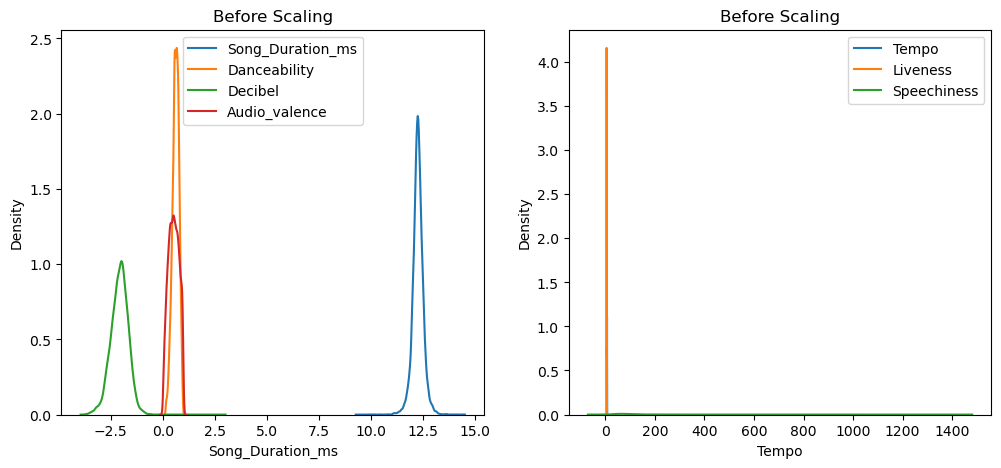

In [83]:
#Display before scaling

# plt.title('Before Scaling')
# sns.kdeplot(X_train['Song_Duration_ms'], label ='Song_Duration_ms')
# sns.kdeplot(X_train['Danceability'], label ='Danceability')
# sns.kdeplot(X_train['Liveness'], label ='Liveness')
# sns.kdeplot(X_train['Tempo'], label ='Tempo')
# sns.kdeplot(X_train['Audio_valence'], label ='Audio_valence')
# # sns.kdeplot(X_train['Acousticness'], label ='Acousticness')
# plt.legend()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
sns.kdeplot(X_train['Audio_valence'], ax=ax1, label ='Audio_valence')
ax1.legend()

ax2.set_title('Before Scaling')
sns.kdeplot(X_train['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train['Speechiness'], ax=ax2, label ='Speechiness')
ax2.legend()
plt.show()

In [84]:


# fit the scaler to the train set, it will learn the parameters

# transform train and test sets

# X_train_means = X_train.mean(axis=0)
# X_train_ranges = X_train.max(axis=0)-X_train.min(axis=0)
# X_test_means = X_test.mean(axis=0)
# X_test_ranges = X_test.max(axis=0)-X_test.min(axis=0)
# X_train_scaled = (X_train-X_train_means)/X_train_ranges
# X_test_scaled = (X_test-X_test_means)/X_test_ranges


# fit the scaler to the train set, it will learn the parameters
# scaler = MaxAbsScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [85]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [86]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([12.26276484,  4.        ,  0.63261   ,  1.        ,  4.83540374,
       81.9       ,  6.43304388,  0.527     , -2.05062561,  4.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [87]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([  0.27806498,   5.        ,   0.21186   ,   4.        ,
         0.22076276, 119.4       ,   0.6063728 ,   0.391     ,
         0.54511859,   5.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ])

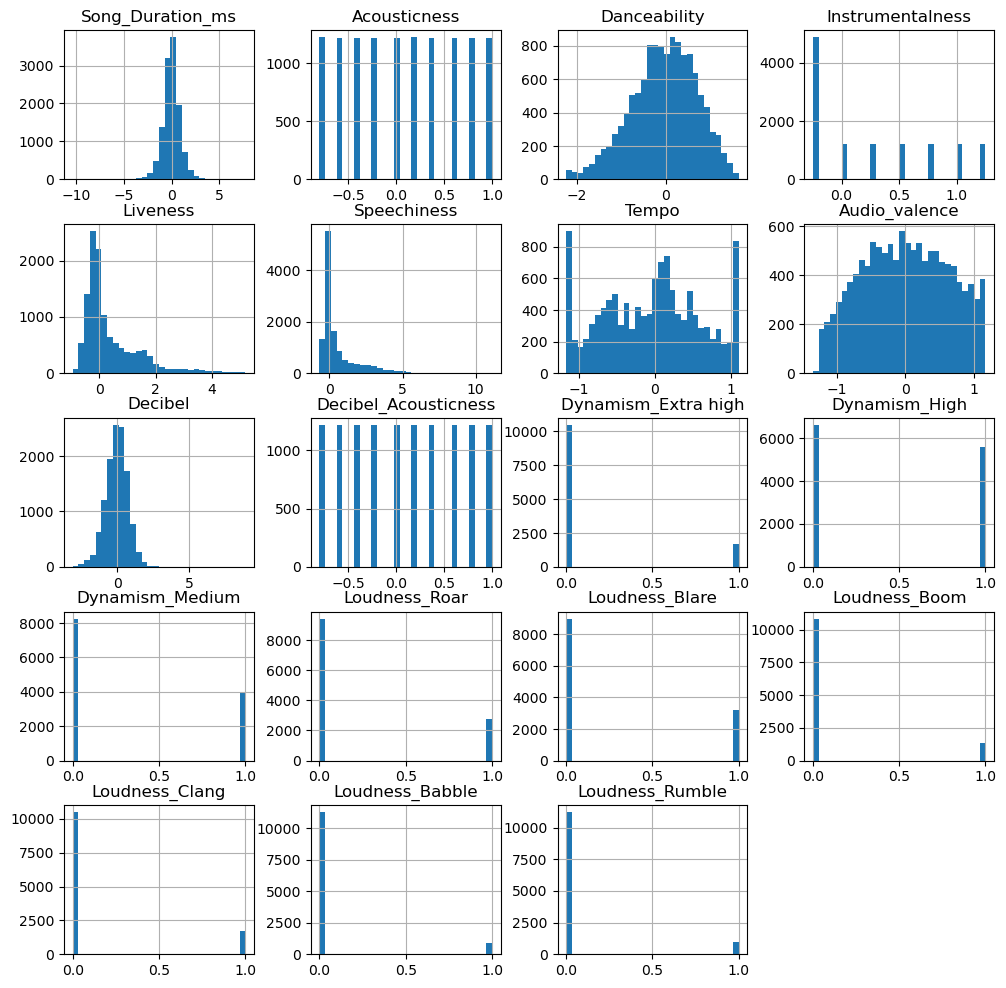

In [88]:
X_train[[c for c in X_train.columns if X_train[c].dtypes !='O']].hist(bins=30, figsize=(12,12))
plt.show()

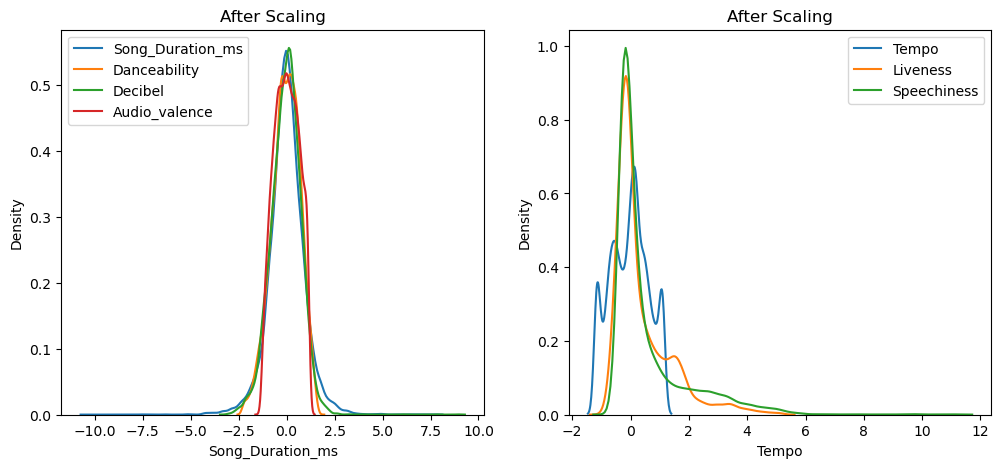

In [89]:
#Display after scaling

# plt.title('After Scaling')
# sns.kdeplot(X_train['Song_Duration_ms'], label ='Song_Duration_ms')
# sns.kdeplot(X_train['Danceability'], label ='Danceability')
# sns.kdeplot(X_train['Liveness'], label ='Liveness')
# sns.kdeplot(X_train['Tempo'], label ='Tempo')
# sns.kdeplot(X_train['Audio_valence'], label ='Audio_valence')
# # sns.kdeplot(X_train['Acousticness'], label ='Acousticness')
# plt.legend()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
sns.kdeplot(X_train['Audio_valence'], ax=ax1, label ='Audio_valence')
ax1.legend()

ax2.set_title('After Scaling')
sns.kdeplot(X_train['Tempo'], ax=ax2, label ='Tempo')
sns.kdeplot(X_train['Liveness'], ax=ax2, label ='Liveness')
sns.kdeplot(X_train['Speechiness'], ax=ax2, label ='Speechiness')
ax2.legend()

ax2.legend()
plt.show()

### Step 8: Feature Engineer

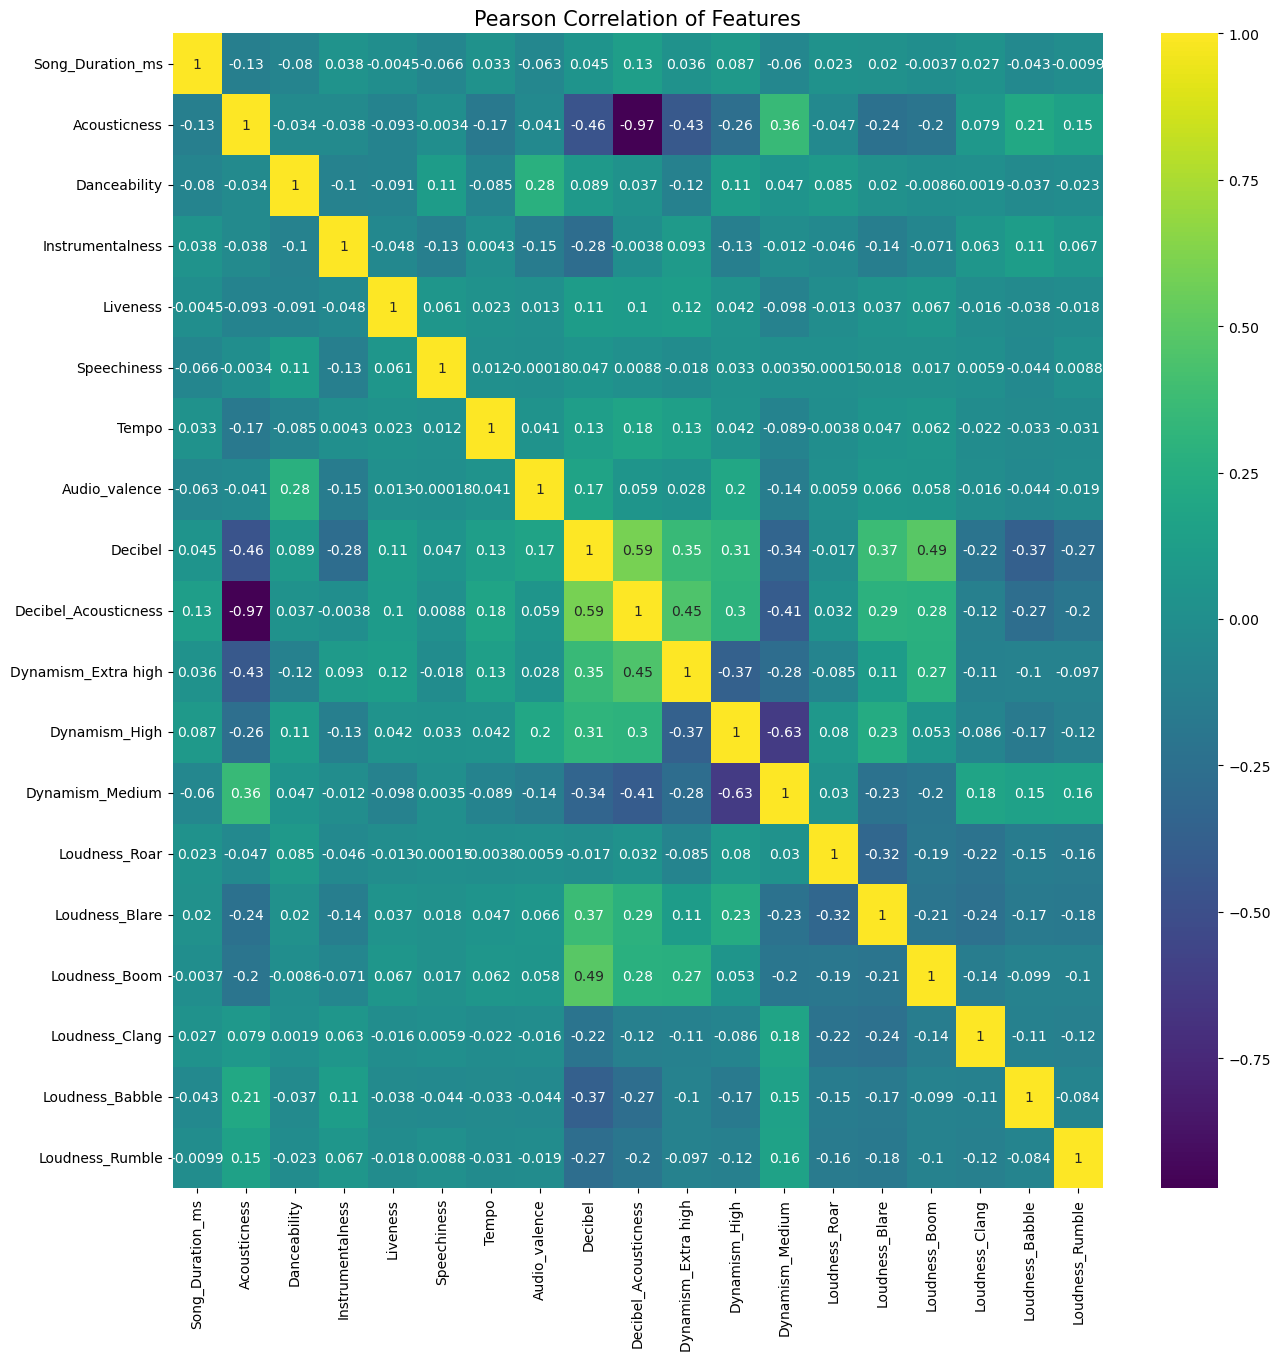

In [90]:
# Heatmap: visualize the correlation between any two features / variables
num_cols = [c for c in X_train.columns if X_train[c].dtypes !='O']
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(X_train[num_cols].corr(), cmap=colormap, annot=True)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.show()

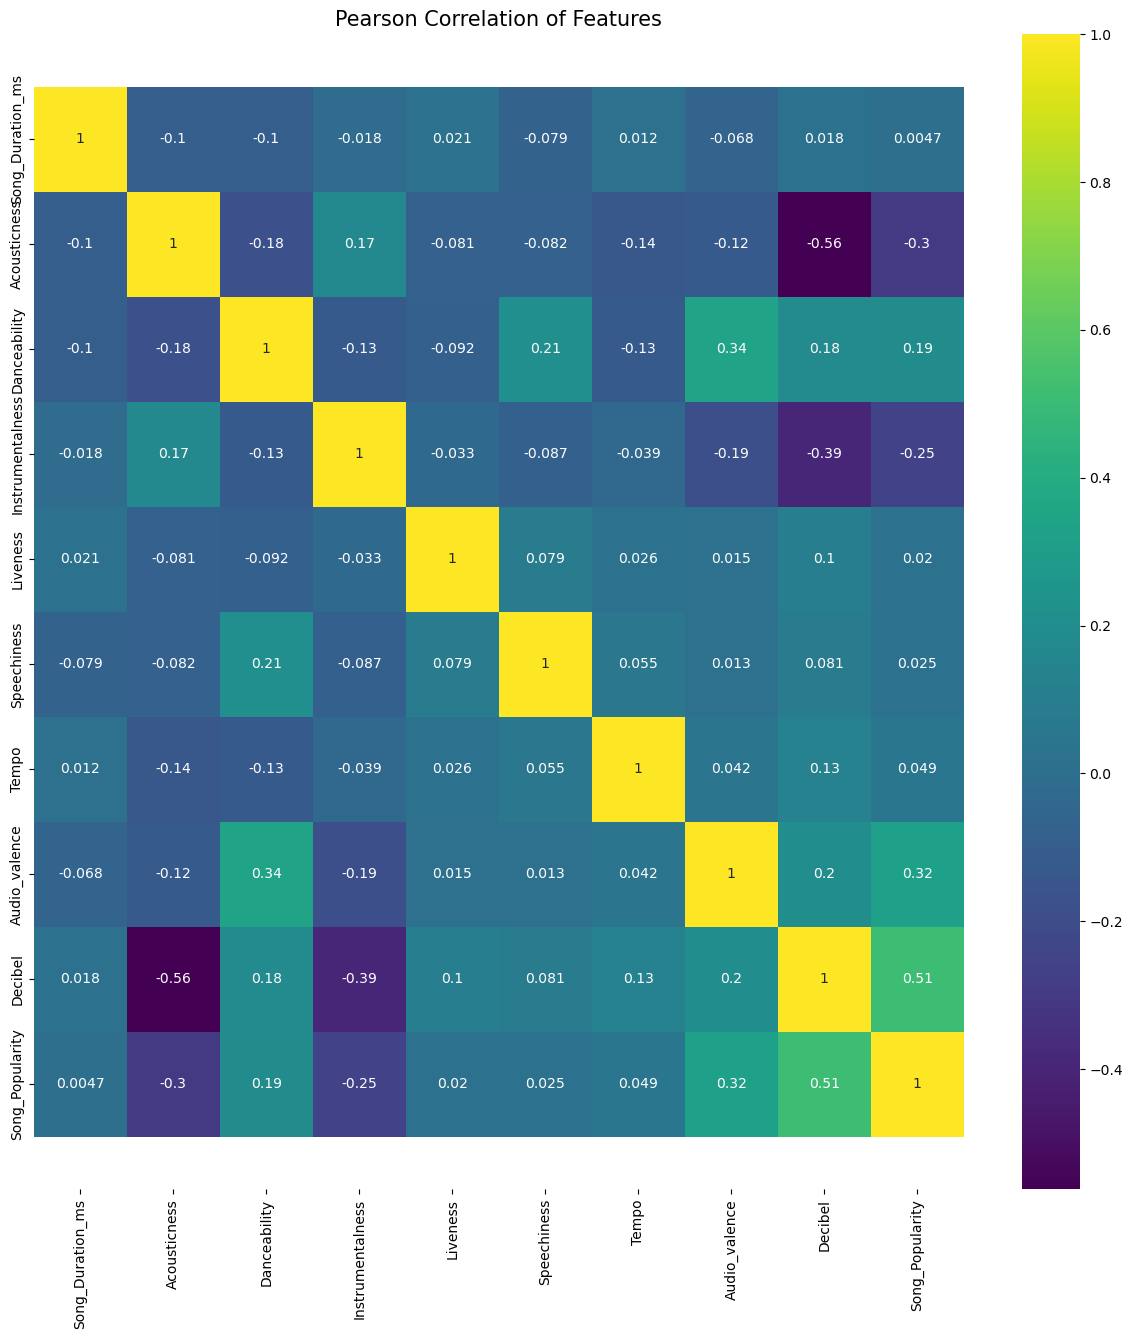

In [91]:
# Heatmap: visualize the correlation between any two features / variables
num_cols = [c for c in data.columns if data[c].dtypes !='O']
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(data[num_cols].corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

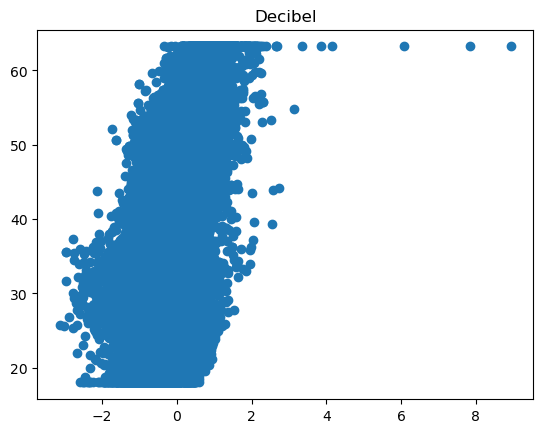

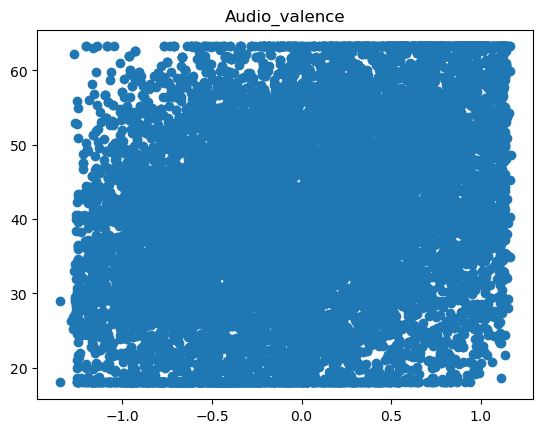

In [92]:
# plot relation of features of interest with the target

for f in ['Decibel', 'Audio_valence']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [93]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [94]:
#calculates the new features
poly.fit(X_train[['Decibel', 'Audio_valence']])

PolynomialFeatures(degree=3, include_bias=False)

In [95]:
train_t = poly.transform(X_train[['Decibel', 'Audio_valence']])
test_t = poly.transform(X_test[['Decibel', 'Audio_valence']])


In [96]:
print(poly.get_feature_names_out(['Decibel', 'Audio_valence']))
print(len(poly.get_feature_names_out(['Decibel', 'Audio_valence'])))


['Decibel' 'Audio_valence' 'Decibel^2' 'Decibel Audio_valence'
 'Audio_valence^2' 'Decibel^3' 'Decibel^2 Audio_valence'
 'Decibel Audio_valence^2' 'Audio_valence^3']
9


In [97]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names_out(['Decibel', 'Audio_valence'])


test_t.head()

,Decibel,Audio_valence,Decibel^2,Decibel Audio_valence,Audio_valence^2,Decibel^3,Decibel^2 Audio_valence,Decibel Audio_valence^2,Audio_valence^3
0,0.532061,0.258312,0.283089,0.137438,0.066725,0.150620,0.073125,0.035502,0.017236
1,-0.109572,0.398977,0.012006,-0.043717,0.159183,-0.001316,0.004790,-0.017442,0.063510
2,-1.398678,-0.969309,1.956301,1.355752,0.939561,-2.736236,-1.896261,-1.314143,-0.910725
3,0.449998,-0.130435,0.202498,-0.058695,0.017013,0.091124,-0.026413,0.007656,-0.002219
4,-1.118956,-0.685422,1.252063,0.766957,0.469803,-1.401003,-0.858191,-0.525689,-0.322014


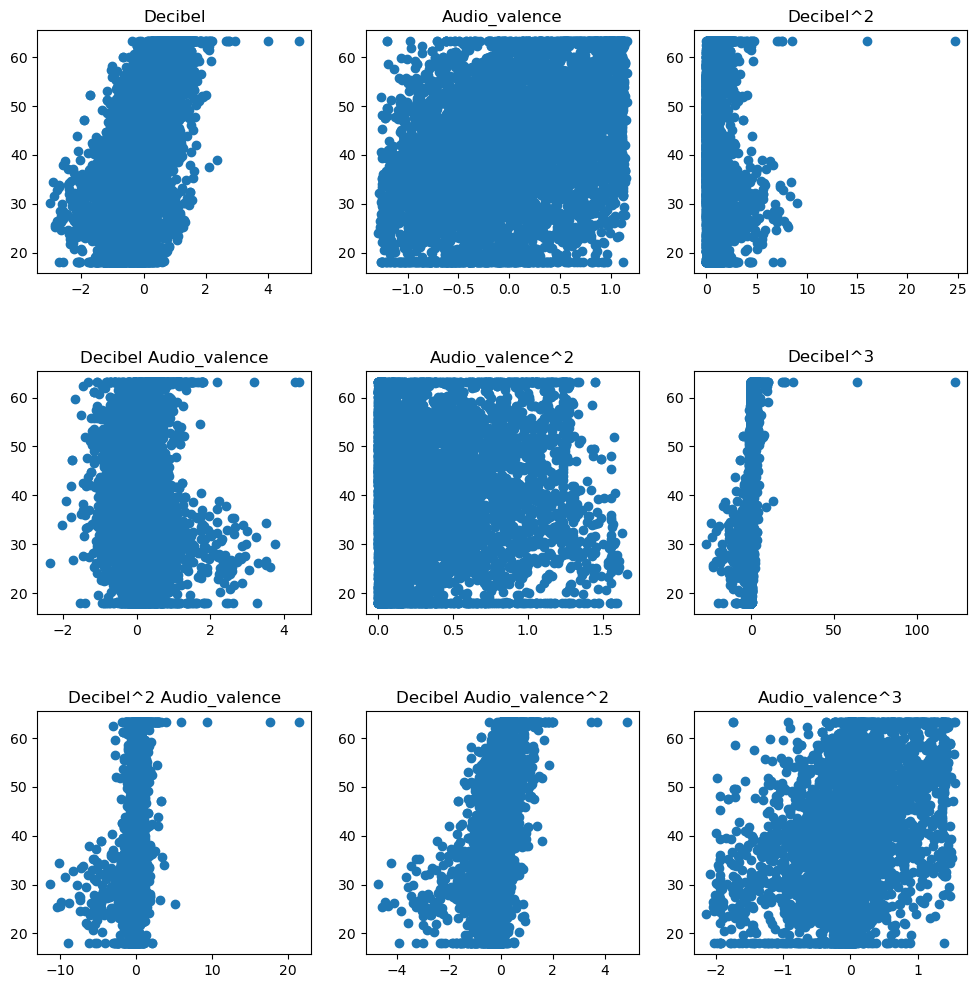

In [98]:
#no correlations between features
def plot_features(df):

    # function plots 9 images
    nb_rows = 3
    nb_cols = 3
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(test_t[test_t.columns[n]], y_test)
                axs[i, j].set_title(test_t.columns[n])
                n += 1
    plt.show()
    
plot_features(X_test)

In [99]:
pca = PCA()
pca.fit(X_train)

PCA()

In [100]:
X_train_scaled = pca.transform(X_train)
X_test_scaled = pca.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
X_test = pd.DataFrame(X_test_scaled, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [101]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

19
[0.22254777 0.1626927  0.12077582 0.11078318 0.07560512 0.0515879
 0.05002224 0.04266372 0.03573518 0.03002233 0.02705703 0.02051056
 0.01727186 0.01336348 0.0099852  0.00513446 0.00197713 0.00167747
 0.00058684]


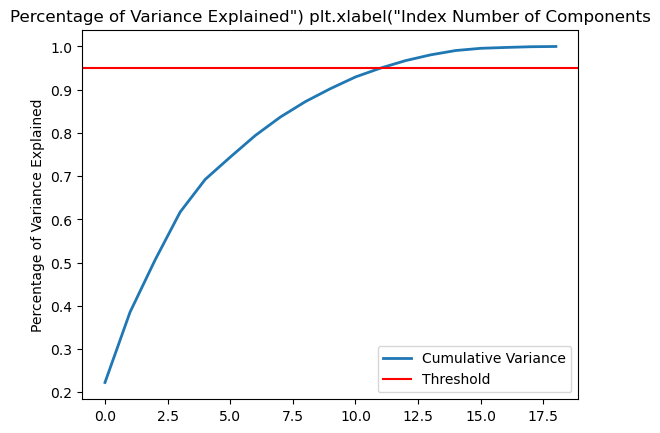

In [102]:
#11 principal components take up 95% of the percentage of variance explained
threshold = 0.95
#Cumilative explained ratio
#pca reduces perfromance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_explained_variance, linewidth=2)

plt.axhline (y=threshold, color="red")

plt.title('Percentage of Variance Explained") plt.xlabel("Index Number of Components')

plt.ylabel("Percentage of Variance Explained")

plt.legend(["Cumulative Variance", "Threshold"])

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [103]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.145876,0.198414,-1.154115,0.915629,-0.943715,-0.148156,0.938512,0.438438,0.400412,0.678560,-0.042006,-0.334993,-0.786938,0.592480,0.145066,0.083719,-0.087351,-0.065026,-0.043392
1,2.800042,-0.115892,-0.372671,-0.410126,-0.206288,-1.078619,-0.672314,-0.613132,-0.055334,0.561662,0.585250,-0.414564,0.108768,0.163516,0.007177,0.046224,-0.043377,-0.016008,0.026778
2,-0.366069,0.620179,-0.860968,0.544798,-0.170806,0.775184,-0.195235,-0.544129,-0.034634,-0.167464,-0.746548,-0.101896,0.011990,-0.074437,-0.034908,-0.081804,0.000541,0.018807,0.004996
3,-1.083173,0.193800,-0.343902,-1.092526,-0.027463,-0.252129,0.267420,-0.673182,-0.352043,0.307359,0.873195,-0.462441,0.243675,0.105993,0.021843,-0.005370,-0.080960,-0.026185,-0.002953
4,0.306689,0.714255,-1.033615,0.141676,-0.422828,0.425441,0.346345,-0.679893,0.205798,-0.607937,-0.079737,-0.328576,0.293426,-0.101775,-0.043123,-0.041626,0.024471,0.045212,0.024620


In [104]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [105]:
X_train_final = X_train
X_test_final = X_test
y_train_final = y_train
y_test_final = y_test

In [106]:
#X_train_final = X_train_student_final_premodel_version
#X_test_final = X_test_student_final_premodel_version

#y_train_final = y_train_student_final_premodel_version
#y_test_final = y_test_student_final_premodel_version

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136


# Report

## Introduction with Value Based Problem Statement; Problem Understanding 



The music companies are constantly striving to understand the attributes that make a song popular, as the industry of music has always been very competitive, thus a data-driven approach is prefered to identify the things that make a song popular, by making use of data analysis and predictive modelling, XYZ music records will be able to stand against competition in the music industry. 

I am tasked to role play as a data analyst at XYZ Music Records Company, I have been instructed to investigate the impacts in a variety of song attributes on a csv dataset file based on song popularity. My goal is to conduct data analysis on the dataset, wrangle the data from my previously learned data transformation techniques to predict a Song's Popularity based on the various characteristics. Through this analysis and wrangling of the dataset, it will provide the managemtn team with incredibly valuable insights, subsequently helping them optimize their allocation of their marketing resources. An incomplete data dictionary containng the definitions of some data columns. 

The model we will be using to predict the Song popularity is a linear regression, where Song Popularity will be the target variable I wil be trying to predict based on the data I trained and test. In order to accurately predict the Song popularity variable based on the columns present in the data set, I would have to clean my data through a series of steps such as imputing its null values which handles the null values through a variety of techniques such as replacing the nulls with mean, median or mode, all depending on the nature of the data, handling its outliers, which can have a significant impact on the linear regression model since the model performs better when outliers are handled properly, some techniques include trimming and capping which caps the outliers within the 5 and 95 percentiles of the variable, adding new features or feature engineering which can enhance the model performance through creating new columns based on mathematical operations calculated between two or more columns, transformations which help normalise skewed distributions and scaling techniques such as minmax, robust and standard scaling to normalise all data ranges to make it more suitable for principal component analysis; dimensionality reduction. 

All these techniques have to be applied to the data to achieve accurate results for the linear regression model to predict Song popularity. In summary, I have to wrangle the data through, firstly conducting EDA exploratory data analysis, preperation and transformation through different techniques, secondly prepare the data for modelling by using a linear regression model, and lastly document analysis, comparison and findings through comparison of the linear regression models MSE(Mean Square error), R square and distributions of each variable. 

452 words

## Exploratory Data Analysis 

### Overview of the data
using .head() and .tail() on the dataframe,it showed the data had 18835 rows and 18 different columns. A .info() shows me the data types in the dataframe where the variables Code, Song_Name, Liveness, Dynamism, Loudness are objects, Song_Duration_ms, key and Audio_mode are integers while the rest are floats. Using a .Describe() shows me the statistics of numerical columns. 
Here is what I observed:
•	count:  most of the variables contain 18835 entries except for variables for Danceability and Speechiness,  which had counts of 15938 and 13184 respectively, indicating the presence of null values in both of these columns. 
•	Minimum and Maximum: Majority of the columns have their minimum value as 0 while some lowest numbers such as the Decibel column has a minimum value of -38.76 while the column with the highest minimum value was in indicator. 	There are different ranges between the columns, some range from 0-1, 0-100, -38-1.5, so on and so forth, suggesting that the data requires scaling later on.
•	Mean: All the mean values in each column are positive with the exception of Decibel, suggesting that the most of the data in Decibel have negative values, while other columns with low mean values such as Instrumentalness or Acousticness have ranges between 0 to 1. However, it is not recommended to rely on the mean for a central tendency as some variables may be skewed or the mean is influenced by extreme outliers. 
•	Standard deviation: By taking to account of the ranges of each column with Max-Min, some columns such as Indicator and Tempo show that there is a large variation of the data possibly indicating it being not symmetrical

### Visualising the nature/trends of the data

**Quantifying missing data**

I created a vertical bar chart that quantifies the missing data in each column. I used data.isnull().mean() to find the percentage of missing values for each column. From the graph it shows that Speechiness, Danceability and Dynamism have null values present in their columns. Speechiness has the highest percentage of null values showing that around 30% of its values are null while Danceability has the lowest percentage of null values where 15% of it make up the nulls. The rest of the columns do not have null values but they may surface during the data preprocessing step.  
Heatmap of correlation of features
In my second visual I used a heatmap to display the strength of correlations between each numerical variable denoted by a number ranging from -1 to 1. In the dataset the lower the number the stronger the inverse correlation of features while the greater the number the stronger the direct correlation of features. Based on research, a correlation between 0.7 to 1.0/-0.7-1.0 Is considered a strong correlation, that is something I have to look out for in my features because the linear regression model I am tasked to predict Song_popularity is sensitive to multicollinearity, meaning that the stronger the correlation between the variables, the performance of the model won’t be as optimal. And looking at the model it seems that Energy and Indicator have a perfect correlation with each other with a value of 1, additionally, both also have a strong correlation between Decibel with a value of 0.76. Thus both need to be dropped.


**Cardinality in each variable**

In my next chart it shows the number of unique values in each dataset, I have to cross reference it to data.head() because some variables may appear numeric but they are actually discrete by nature. I filtered out the numerical variables by using list comprehension to obtain the variables that have the object data type.  In the graph I see that Dynamism and Loudness have no cardinality but by with the help of .nunique() it helps me identify the number of unique values in each categorical variable, and it tells me that Dynamism and Loudness actually have cardinanility, it is because the cardinality for Song_name is so high it made the values insignificant for those two variables. Liveness, which seems to be only have float values was regarded as an object, making it mandatory for me to change its data type back to float. 


**Distributions of numerical variables**

This is a bunch of subplots showing histogram distributions of all the variables, from the distributions I see some that look normal, skewed and some have few lines suggesting that those are the discrete variables which as seen are key and Audio_mode. Song_Duration_ms, Speechiness and Acousticness are extremely right skewed while Tempo seems to be bimodal as seen with it having two peaks and right skewed,  Decibel is left skewed, while Danceability, Energy,  Song_Popularity and indicator are also left skewed but to a small extent and appear normal. Audio Valence appears normal but has a slightly rectangular shaped distribution. Instrumentalness has the most extreme right skewness compared to all other distributions. 


**Rare categories and value counts**

I focused my interests on two categorical variables; Dynamism and Loudness since logically they have some degree of impact on song popularity since they are associated with sound, I did not focus on key since it is the note the song was played in or audio mode as well since both had weak associations with the target variable. In short, Dynamism has broken up words that need to be mapped correctly by replacing the broken words into actual category names, Loudness on the other hand has more categories than Dynamism, it has ‘?’ as one of the categories meaning it needs to be replaced as null along with it having a lot of rare categories shown by sme categories being under the red line which is set to 5%. 


**Boxplots**

The boxplots also reflect the histogram distributions of the variables, also telling me which ones I should handle its outliers.  Those with a long line of outliers on one side like Speechiness show it is skewed by nature while others with outliers on both sides are normal such as Song_Popularity.

992 words

## Cleanse the Data 


This step covers the preprocessing part, which are influenced by my exploratory data analysis on the initial nature of the data.

**Replace question marks**
Replacing the question marks in the Loudness variable with a Null value: Earlier on in my exploratory data analysis I saw that there was a question mark as one of the categories in Loudness, I find this weird since loudness is related to sound so why would there be one of the categories being’?’, so I used the .replace method to replace all the question marks with np.nan. When I checked the number of null values in each variable, I see that Loudness now has 1902 null values, which doesn’t seem to be as much as compared to Speechiness which had 5651 which was 30 percent of the entire data. 

**Delete row**
I continued to investigate why Liveness was considered an object when I first imported the data into a data frame, it turns out that after replacing the question marks earlier with a null value, I saw that liveness had one row having its value as a question mark, which explains why pandas saw Liveness as an object rather than having a data type of a float, seeing that it was only one row, I decided to drop it as its effects on the distribution of the dataset was insignificant. Subsequently, after the null value was taken care of, pandas automatically recognises that Liveness was actually a column with the data type float so it was re-casted as float64.

**Map incorrect words to proper categories**
Now for dynamism, which had some different categories with some being words that were broken up. Some examples included ‘Lo’, ‘Hi’ and ‘Med’ etc. So I paid close attention to what the categories actually stand for and derived that there were actually suppose to have four unique categories which were Low, medium, High and Extra High. So I created a replacement dictionary with the incorrect category name as the key and the correct value as the value, then I used the replace method to replace all the wrong words in the Dynamism column, reducing the cardinality of Dynamism from 11 down to 4. 

**Remove duplicates**
In my next part of preprocessing, I checked if there were any duplicate rows as a song with the same information as another is not possible since all songs are unique and have their different set of attributes of the data, in fact the presence of duplicates highly suggests that there were data entry errors. So I used the .duplicated() method to filter out the data’s duplicates I then proceeded to remove the duplicates, comparing the shape of the data before and after. Before the data had 18834 rows but after removing the duplicates it dropped to 17402 rows. And due to the dropping of rows, I did a data.isnull().sum() and saw that some null values were removed in the process but not to a large effect since it did not change the percentage of missing values for the columns.

**Cap outliers for target variable**
For the part of handling the outliers I handled only one column here and the rest after Train-test split.  The only column I handled outliers here was Song popularity, earlier in my data analysis I saw that the boxplot of Song popularity had very few outliers, the method I used to handle its outliers was a 90% windsorization, which caps the outliers to the 5 and 95 percentile. The reason why I used capping instead of simply removing them was because I only wanted to reduce the effect of outliers at the same time preserve the integrity of the data. Likewise, the linear regression model is sensitive to outliers too where outliers will worsen its performance, especially since song popularity is the variable I will be predicting, handling its outliers will make the model more accurate and predict better.  Setting a 90% windsorization also retains majority of the columns’s characteristics since it preserves a larger range of the distribution.

**Drop columns**
For my last step of preprocessing I dropped some columns. I dropped Song_name because it was a redundant column, having close to as many unique values as the number of rows itself, this high cardinality column is no different then another index column and a song name can’t help predict song popularity, so it was dropped. Next were Code, Key and Audio_mode, I dropped all these for the same reason; they did not have much association with song popularity, when I visualised them on the heatmaps, they all had extremely low correlations with Song_popularity, addition to that knowing a key which was the musical note the song was played in doesn’t strongly suggest it has any impact on the song popularity since any song can be played in a different key and still be popular.  Code is simply a string with a letter and a number which is not meaningful in predicting song popularity, Audio Mode as well since it only has two values. Energy and Indicator were dropped due to them having strong correlations between variables, in order to improve the model’s performance, they were dropped, decreasing the number of columns in the data from 18 to 12.

850 words

## Imputing the null values

In my next step I will be explaining how I imputed the null values for four categories; Dynamism and Loudness, which were categorical columns, Speechiness and Danceability. At first I explored different methods starting simple with imputing the null values in numerical categories, starting with imputing the null values with the mean in danceability since Danceability had a rather normal distribution, so I took the mean as a central tendency whereas for Speechiness, its distribution was rather right skewed so I imputed its null values with the median instead, approaching the median as a central tendency to reduce biasness.  I saw that because I had quite a number of null values in the numerical variables, it caused the mean portion of danceability to stick out, similarly to speechiness as well but it was somewhere in the middle since it was imputed with its median, somewhat making the variables skewed. To test if the numerical variables are Missing completely at random, I created a heatmap and the result was that both variables’ missing data was scattered everywhere, meaning it was completely missing at random, thus I implemented random sample imputation on both. This preserves the distribution by extracting random observations from both variables in the process. 

For the categorical variables I initially grouped the missing values in Dynamism aa one new category since Dynamism only had 4 categories, then replaced the null values in loudness with the highest frequency.  However I felt that by doing so for Dynamism loses the information  about why it is missing and for Loudness doing so introduces biasness, the techniques may be easy and fast to implement but many problems come with it. So instead I tried a different method of imputing. Firstly I performed a chi square test on all numerical variables with Dynamism and Loudness after imputing Speechiness and Danceability with the random sample imputer. I excluded instrumentalness because it had too many zeros which caused error when calculating the p-value in chi square test. My null hypothesis suggests there is no relationship between the variables and the alternate hypothesis suggests there is. By reading the documentation on python’s chi square test method, it takes in a contingency table which is the number of occurrences in each cell across a table between two variables. Since the chi square test checks if there is a relationship between two categorical variables, I had to discretise the numerical variables as ranges using the pandas qcut method, splitting them into bins where it shares the same count as the number of categories for dynamism and loudness. I then converted it into a contingency table and pass through the method. The method returns four values one of them being the pvalue so I only printed that out. The results for both categories show that Acousticness and Decibel have a relationship with them denoted with the p value being 0.0 which is less than 0.05. However, since the chi square test only shows if there is a relationship between categorical variables I had to conduct more analysis to see if they really have a strong relationship. So I use the groupby method to group the categorical variables to the two numerical, showing side by side the category name and the max value in each group. 

From my findings of Dynamism, when sorted in descending order based on decibel, the relationship appears to be strong as seen where the category was organized from Extra high -> High -> Medium -> Low and the decibel follows the trend where as it goes down the decibel value is lower too, the same order the dynamism category is also represented with acousticness where the Extra High category has low acousticness while for low has high acousticness. Likewise with the loudness category, in logical terms ear-splitting which is a loud phrase corresponds with a high decibel value and low acouticness value while phrases that sound soft like whisper have low decibel and high acousticness. Given the trend is clear, I decided to combine both acousticness and decibel together and impute the missing categorical variables based on them, this allows me to capture more information with the data and impute the nulls through a composite feature.  After creating the new feature, I grouped the new feature values according to the number of unique categories for dynamism and loudness to bins, then creating dictionaries based on the new intervals created for each categorical variable. In the end, I created a function that takes in a row as its parameter, checking if the dynamism or loudness column is null then using a for loop to run through each dictionary to check if the new feature is within the threshold then imputing it with the category. 

782 words

## Data transformation

**Handling outliers part 2**

Earlier I pointed out that I only handled outliers for one variable which was song popularity at preprocessing since it was the target I want to predict and handling its outliers would improve the linear regression model’s results. However, if I handled the rest of the non target variables, I could risk overfitting the data, I will explain more of this in the linear model chapter. In short, handling outliers is always crucial since it helps make the model performance perform better. However that is not always the case since some variables have lots of outliers spread across the entire axis, suggesting it is actually the nature of the distribution. Lets revisit the boxplots in dept.  Because distributions of decibel and the new feature of Decibel*Acousticness are left skewed, the result causes outliers to be seen on the bottom part of their box plots, the opposite applies for Speechiness, Liveness, Instrumentalness and Song_duration_ms. Thus I would only handle those boxplots with a less skewed distributions with less spread out outliers. Those two that fulfil the  requirements are tempo and danceability. I used two different methods first is for Tempo, I used a 90 percent windorization, since the outliers for it were rather far away from the whiskers and I aimed to reduce the effect of outliers while retaining the most information on tempo. For danceability I capped the outliers at the 3rd standard deviation since the distribution of danceability is rather normal,  and only on the left side since that’s where majority of the outliers are. Trimming is rather hard to apply for the variables because of the distributions, you can’t handle the outliers by trimming without removing a large majority of the information.


**Encoding (Categorical)**

Earlier on I plotted some graphs showing the count of each category for Dynamism and loudness, additionally showing the red line denoting anything under the line is considered a rare category. After the imputation of null values, it shows that Dynamism does not have any rare categories while Loudness has more than half which are rare categories, which is quite a lot. So I grouped the rare categories as one new group label  ‘Rare’, by doing do I will reduce noise in the data, making it less sparse in the process.  For the linear model to run, it requires all variables to be numerical, that’s when encoding comes in. For my encoding method, I used one hot encoding after grouping the rare categories in Loudness, applying to Dynamism and Loudness. The reason for using this method is that it is able to preserve the categorical uniqueness without assuming any hierarchy in the data, additionally it is also very easy to implement and feed to the model. 


**Transformation (Numerical)**

Transformation techniques are useful for making distributions more normal, I first analysed the QQ plots and distributions of numerical data, the more normal the distribution the better the fitting of the QQ plot one example would be the variable Danceability where since its natural distribution is close to normal, I did not transform it . Instead, I looked out for distributions were really not fitting the graph that are usually s shaped or skewed distributions. Some examples of skewed distributions included Speechiness, Liveness and Instrumentalness.  Their distribtuions were commonly exponential shaped if they are positively skewed it should look like a steep slop going up and the shape is opposite when negatively skewed. Thus I experimented with the different transformation techniques to see the data’s ‘reaction’ to them. I observed that extremely skewed distributions tend to respond better by fitting the QQ plot through intense transformation methods like log while those who have a relatively close shape of a normal distribution tend to bit better with yeo johnson. If it was the other way round, the log transformations would skew the normal distributions and the yeo johnson wouldn’t have a strong transformation effect on the skewed variables. So I classified the variables to two groups, those that are very positively skewed go to log transformation since it can only handle positive values, I also added 0.01 to handle the zeros in instrumentalness. And those that are close to a normal distribution such as decibel go to yeo johnson since it can handle negative values. In the end most of the distributions improved and fit the QQ plot better but instrumentalness did not, showing that it is so skewed even strong transformation tech niques do not change its distribution.


**Binning**

My approach for binning was to bin those variables that have their distributions spread across the entire X axis in their distribution, some distributions that fall under this category included the new feature Decibel_Acousticness, and Acousticness. in addition to those two I binned, I also binned Instrumentalness because it is extremely skewed, even its box plot displayed lots of outliers due to its nature, even transformations do not work on it so I decided to bin it to reduce its magnitude of skewness.  The binning technique I used was equal frequency, since the distributions were uneven, if I were to use equal width it would make the bins biased since their distributions are not uniform. 

866 words

## Feature engineering


**Creating new features**

For feature engineering, the only feature I created was the Decibel_Acouticness, it was the product between the Decibel and Acoutsicness, it was created when I was imputing null values for Dynamism and Loudness when I saw a relationship between Decibel and Acoutsticness with the Categorical variables, this allowed me to impute the missing values based on the thresholds created from the feature. Features are usually created to improve the model performance, and especially since the linear regression model is sensitive to multicollinearity, by creating new features based on highly correlated ones, it can possibly create features with weaker correlations among features, allowing the model to perform better. Likewise, Decibel and Acousticness have relatively strong inverse correlations around -0.56, so creating a new feature between both of them not only helped me impute my missing categorical values but also reduced multicollinearity. 

**Feature scaling**

The next part of feature engineering was performing feature scaling on all of my features. I could not find specific reasons to decide on a scaling method so I tried different scaling methods and took the best performing one that gave better looking distributions to the variables. Initially the kdeplots of the graphs looked very thin for most of the variables. Here is the after results
Max Absolute  scaling:  this scaling method scales the data by dividing all observations by the maximum value of the variable, after this scaling the kdeplot Song duration and liveness became very tall and skinny, while the rest were really short and was spread across the X axis. Here is the results:
train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136

Mean normalizer: this method  subtracts the mean from each observation and then dividing the result by the difference between the minimum and maximum values. The end result shows Song duration, decibel,  and speechiness with slightly wider graphs while audio valence, danceability had wide but short distributions, tempo on the other hand was also wide and short but had an uneven distribution, liveness had a skinny but short distribution.  here is the results:
train_mse: 97.89974237617237 
 test_mse: 103.80518952133195
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.34922730578912375

Standardization: This scaling process centers the variable at zero and standardizing the variance to 1 by subtracting the mean from each observation and then divide the result by the standard deviation. After scaling, the kde plots of song duration, danceability, decibel, audio valence had rather normal distributions with tempo and liveness also had a close to normal distribution by skewed on the right, tempo’s distribution was short and relatively flat with uneven peaks. 
train_mse: 97.89974237617237 
 test_mse: 95.66630011481024
train_r-sq: 0.38659198933227956 try this one
 test_r-sq: 0.4002514117263134


MinMax Scaling: this scaling method scales the distributions to a range of 0 and 1, it is done by subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values. From my kde plots after scaling, song duration and decibel had good normal distributions, speechiness and tempo were also close to normal but still right skewed. The rest of the variables’ distributions were short and spread out.  Results:
train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136

Robust scaling: This method removes the median value from the observations and the result is divided by the inter-quartile range. From my results, most variables’ distributions became normal.  Except for liveness and speechiness which were still skewed, despite this, tempo’s distribution looked more similar to a normal distribution but still had multiple peaks which made the distribution weird looking. 
train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136

In summary, I chose the robust scaling among the others as it made my variables more normal 
and symmetric which was crucial for my model to work more effectively. 

**Polynomial expansion**

When it came to polynomial expansion, which in my opinion was a great method to create new 
features  easily so you don’t have to think carefully on how to create your feature, the function simply creates features based on parameters such as the degree and number of variables you add inside I only used two variables which were the variables that had a somewhat strong correlation with the target variable, and that was Decibel and Acousticness, after carrying out the polynomial expansion and plotted the scatterplots between the new features, there was hardly any trands seen as most of the plots were spread out or cluped together to form one vertical line. However if you add too many variables it could lead you to the curse of dimensionality, making your data sparser which results in overfitting. So I did not do polynomial expansion, here was my result:

train_mse: 98.59924295638548 
 test_mse: 96.32237035864257
train_r-sq: 0.38220914573172404 
 test_r-sq: 0.3961383938498554
 
**Pincipal Component Analysis (PCA)**

In my next part of feature engineering, I tried principal component analysis which was a method to reduce dimensionality of my data, this method however does not improve model performance but instead makes your model run faster. I fit my X_train into the PCA function, then transformed  it, I then plotted the percentage of variance explained graph, with the threshold set to 95%, the end result shows that 11 of the principal components make up 95% of the percentage of variance explained. When I changed the number of components to 11 my performance of the linear regression model became worse. Increasing my mean square error and lowering my R square,
however, it reduced my difference between the X_train and X_test r squared by 0.003. Thus I will not use it 

train_mse: 98.65500987229414 
 test_mse: 96.9055372164877
train_r-sq: 0.3818597283367613 
 test_r-sq: 0.39248241991440613

879 words

## Linear Regression Model 

There were actually many factors affecting the linear regression model,  some factors included multicollinearity; when there is high correlation between the variables the model performance will not perform as well. The action I took to solve this was removing the highly correlated variables in data preprocessing which was Energy and Indicator.  Another factor would be outliers, handling outliers for the target improved the model performance. Scaling also does its part to help improve the model. Now I will show you the results of the mean square error and r square derived from the linear regression model based on the steps, showing how the performance is affected if some techniques like transformation were not done.

**Encoding only**

When only encoding is done, here is the performance of the model as you can see the mse is very high for both and the r sqr is low the difference between the r sqr of train and test is  around 0.016

train_mse: 116.34508638144212 
 test_mse: 113.88625315892638
train_r-sq: 0.37997459919546706 
 test_r-sq: 0.3950875747078956

**With handling outliers**
 
Now with encoding and handling outliers, after handling them you can see that the model performance improved with the mse dropping to around 100 and the difference between the r sqr of train and test decreased to 0.015.

train_mse: 100.09584854366605 
 test_mse: 97.67607503488135
train_r-sq: 0.37283190087115525 
 test_r-sq: 0.387651785007041

**With transformation**

Now we will see encoding, handling outliers and transformation done to the data. We can see that the mse improved again with an increase in the r sqr values for the train and test. Additionally, the range between the r sqr of train and test has decreased to 0.012.

train_mse: 97.57728441823674 
 test_mse: 95.00516430755349
train_r-sq: 0.3886124062373746 
 test_r-sq: 0.40439618649635856

**With binning**

This is the results when binning was added to the series of steps to wrangle the data. It seems that by binning some variables the mse has slightly increased while the r sqr has decreased slightly as well, the difference between the r sqr of the train and test has increased to 0.014.

train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136

**With scaling**

Lastly, this is the result after scaling, it seems that there was no change in the results, telling me that scaling did not have much effect on the model. There are many reasons to this, two which I think would be firstly, the ranges of the data before and after scaling were relatively the same so there was not a significant change in the model’s performance. Another reason could be that there was no multicollinearity between the variables apart from the new feature created from multiplying decibel and acousticness.  

train_mse: 97.89974237617237 
 test_mse: 95.66630011481023
train_r-sq: 0.38659198933227956 
 test_r-sq: 0.4002514117263136

405 words excluding the linear regression results

## Summary and Further Improvements 

In summary, I seem to believe that the linear model may not be suitable for predicting song popularity since the based on my past experimentation of the different methods when wrangling the data, the mean square error usually hovered around 100, and without handling outliers for the target variable song popularity which in usual practice you are not suppose to do anything to the target variable to prevent data leakage or overfitting, the mean square error would be even higher. All in all, choosing a linear model to predict Song popularity, can be complex since this variable has quite a lot of factors influencing it, many of them being non-linear, linear regression models tend to assume a linear relationship between variables to predict the target, so the linear model may not be able to capture the complex relationships enough.  The linear model is also sensitive to outliers in which when wrangling the data, set, due to skewed distributions of some variables, it was hard to get rid of them or even reduce the influence of outliers, this also may have contributed to the linear model’s poor performance. Hence, using a more complex machine learning model such as Random Forests to capture non linear relationships and feature interactions,  the company can also include more other variables contributing to song popularity such as the social media following of the artist, listener demographics, or number of times the music was streamed on other music platforms or even on the company itself. At the end of the day, Song popularity is a challenging variable to predict since it has so many factors contributing to it.  With these new recommendations can the company better predict the song popularity to properly allocate their marketing resources to popular songs. 

292 words

Total words : 5518